<a href="https://colab.research.google.com/github/Rudy-Nzau/Buildings-Energy-Consumption-Forecast/blob/main/Nzau_Rudy_OLIST_Notebook_NETTOYAGE_ET_ANALYSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet 5 - Olist
# ANALYSE EXPLORATOIRE ET NETTOYAGE DES DONNEES

## Objectif du projet : 
- **Réaliser la segmentation d'une clientèle**


## Plan :
- **Partie A : Analyse Exploratoire et Nettoyage des Données**
- **Partie B : Segmentation des clients**


**Partie A - Analyse Exploratoire et Nettoyage des Données**
- 1 - Analyse exploratoire et Nettoyage des différents Datasets
    - Dataset Clients
    - Dataset Données de géolocalisation
    - Dataset Commandes
    - Dataset Objets des commandes
    - Dataset Paiements des commandes
    - Dataset Critiques des commandes
    - Dataset Produits
    - Dataset Vendeurs
    
    Pour chaque Dataset :
    - Traitement des valeurs manquantes
    - Traitement des doublons
    - Traitement des types des colonnes
    - Etude des distributions et traitement des valeurs aberrantes et atypiques
    - Suppression des colonnes inutiles : selection des variables pertinentes pour l'analyse de données
    - Récapitulatif du Dataset nettoyé et analysé


- 2 - Création d'un dataset global en regroupant les différents Dataset


- 3 - Feature Engineering : Création d'un Dataset centré sur les clients
    - Traitement de la localisation des clients
    - Traitement des messages des critiques laissés par les clients
    - Traitement des catégorie des produits achetés par les clients
    - Traitement des temps de livraison aux clients
    - Création du Dataset centré sur les clients


- 4 - Analyse exploratoire du Dataset centré sur les clients
    - Volumétrie des données
    - Etude des variables qualitatives
    - Etude des variables quantitatives

##### Utilisation de 'pycodestyle_magic' pour s'assurer que le code est bien conforme à la norme Python PEP8

In [3]:
!pip install pycodestyle_magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#installing flake8
!pip install flake8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.0 MB/s eta 0:00:00


In [5]:
#activating the pycodestyle magic
%load_ext pycodestyle_magic

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
pd.set_option('display.max_column', 100)
pd.set_option('display.max_row', 100)

##### Chemin du répertoire dans lequel se trouve les dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
root_path = '/content/drive/MyDrive/'

# A - Analyse Exploratoire et Nettoyage des Données

## 1 - Analyse exploratoire et Nettoyage des différents Dataset

### Dataset Clients

In [10]:
customers_df = pd.read_csv(root_path + "olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


##### Il n'y a pas de valeur manquante

In [12]:
customers_df.duplicated().sum()

0

##### Il n'y a pas de doublon de ligne entière

In [13]:
customers_df["customer_id"].duplicated().sum()

0

In [14]:
customers_df["customer_unique_id"].duplicated().sum()

3345

In [15]:
customers_df[customers_df["customer_unique_id"].duplicated()]\
    .sort_values(by='customer_unique_id').head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
87012,d95f60d70d9ea9a7fe37c53c931940bb,004b45ec5c64187465168251cd1c9c2f,57035,maceio,AL
61403,f530197ea86ced9488a03d055e118ebf,0058f300f57d7b93c477a131a59b36c3,40731,salvador,BA
87414,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,72595,brasilia,DF


##### Analyse de la structure des identifiants :
##### Il n'y a pas de doublon sur la variable 'customer_id' mais il y en a sur la variable 'customer_unique_id'
- La variable 'customer_unique_id' correspond à l'identifiant unique d'un client, la variable 'customer_id' correspond à la clé dans le dataset des commandes que nous verrons pas la suite
- C'est donc 'normal' qu'il y ait des doublons sur la variable 'customer_unique_id' et cela correspond à des clients qui ont fait plusieurs commandes
- Un client identifié par son 'customer_unique_id' peut donc avoir plusieurs 'customer_id' qui correspondent à plusieurs commandes

##### La variable 'customer_zip_code_prefix' ne nous sera pas utile pour l'analyse, nous avons déjà la ville et l'état des clients ce qui est suffisant

In [16]:
customers_df.drop(columns=["customer_zip_code_prefix"], inplace=True)

In [17]:
for col in customers_df.columns:
    print(col, " : ")
    print(customers_df[col].nunique())
    print()

customer_id  : 
99441

customer_unique_id  : 
96096

customer_city  : 
4119

customer_state  : 
27



#### Etude des distributions

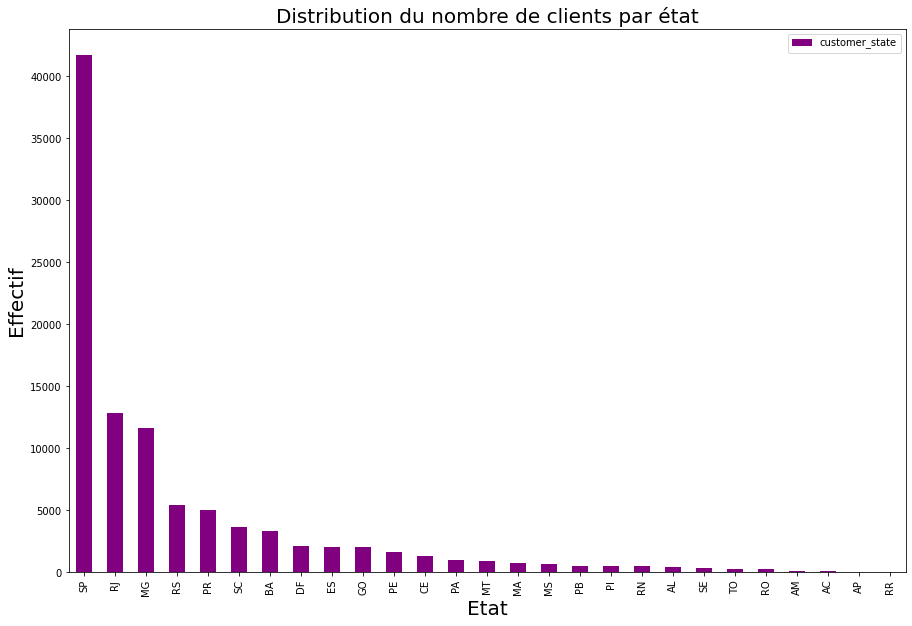

In [18]:
plt.figure(figsize=(15, 10))
customers_df['customer_state'].value_counts() \
    .plot.bar(label='customer_state', color='purple')
plt.xlabel("Etat", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du nombre de clients par état", fontsize=20)
plt.legend()
plt.show()

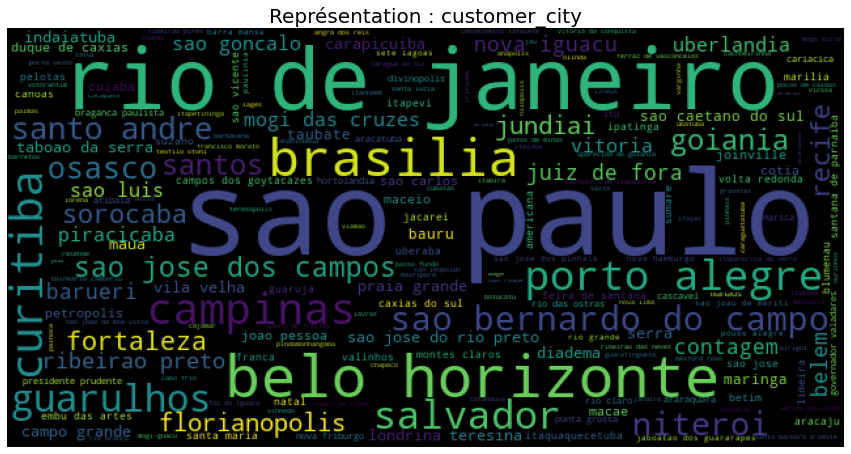

In [19]:
var_occurences = customers_df['customer_city'].value_counts().to_dict()
wordcloud = WordCloud(width=640, height=320) \
    .generate_from_frequencies(var_occurences)
plt.figure(figsize=(15, 10))
plt.title("Représentation : customer_city", fontsize=20)
plt.imshow(wordcloud)
_ = plt.axis("off")

##### Nous supprimons la variable 'customer_city' qui ne nous sera pas utile pour notre analyse :
- Elle comporte trop de modalitée ce qui pose problème pour l'encodage
- Nous avons l'Etat dans lequel le client habite ce qui est suffisant

In [20]:
customers_df.drop(columns=["customer_city"], inplace=True)

#### Dataset nettoyé et analysé

In [21]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


### Dataset Données de géolocalisation

In [22]:
geolocation_df = pd.read_csv(root_path + "olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [23]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


##### Les données de géolocalisation ne nous seront pas utiles pour réaliser la segmentation des clients
##### Nous avons déjà l'état de chaque client dans le dataset des clients ce qui est suffisant pour l'analyse

### Dataset Commandes

In [24]:
orders_df = pd.read_csv(root_path + "olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Il y a quelques valeurs manquantes pour les variables :
- order_approved_at              
- order_delivered_carrier_date   
- order_delivered_customer_date  

In [26]:
orders_df.duplicated().sum()

0

In [27]:
orders_df["order_id"].duplicated().sum()

0

In [28]:
orders_df["customer_id"].duplicated().sum()

0

##### Il n'y a pas de doublon

In [29]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Etude des distributions

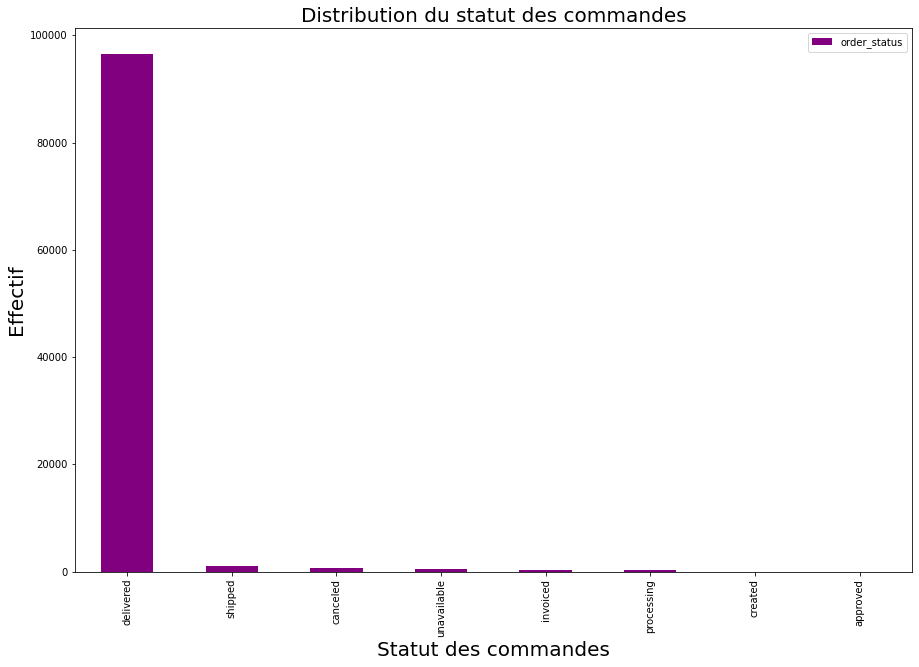

In [30]:
plt.figure(figsize=(15, 10))
orders_df['order_status'].value_counts() \
    .plot.bar(label='order_status', color='purple')
plt.xlabel("Statut des commandes", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du statut des commandes", fontsize=20)
plt.legend()
plt.show()

##### Nous ferons notre analyse uniquement sur les commandes délivrées, nous supprimons donc les autres 

In [31]:
orders_df = orders_df[orders_df["order_status"] == "delivered"]

In [32]:
orders_df["order_status"].unique()

array(['delivered'], dtype=object)

In [33]:
orders_df.drop(columns=["order_status"], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_purchase_timestamp       96478 non-null  object
 3   order_approved_at              96464 non-null  object
 4   order_delivered_carrier_date   96476 non-null  object
 5   order_delivered_customer_date  96470 non-null  object
 6   order_estimated_delivery_date  96478 non-null  object
dtypes: object(7)
memory usage: 5.9+ MB


##### Nous mettons les variables de type date au format date

In [35]:
cols_date = ["order_purchase_timestamp", "order_approved_at",
             "order_delivered_carrier_date", "order_delivered_customer_date",
             "order_estimated_delivery_date"]
for col in cols_date:
    orders_df[col] = pd.to_datetime(orders_df[col])

<ipython-input-35-1b44f128ae9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df[col] = pd.to_datetime(orders_df[col])


In [36]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_purchase_timestamp       96478 non-null  datetime64[ns]
 3   order_approved_at              96464 non-null  datetime64[ns]
 4   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 5   order_delivered_customer_date  96470 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(2)
memory usage: 5.9+ MB


In [37]:
orders_df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


##### Nous gardons uniquement les dates 'order_purchase_timestamp' et 'order_delivered_customer_date'
##### Les dates 'order_approved_at', 'order_delivered_carrier_date' et 'order_estimated_delivery_date' ne nous seront pas utiles pour la segmentation clients, nous les supprimons

In [38]:
orders_df.drop(columns=["order_approved_at", "order_delivered_carrier_date",
                        "order_estimated_delivery_date"], inplace=True)

##### Nous supprimons les quelques valeurs manquantes

In [39]:
orders_df.dropna(inplace=True)

#### Dataset nettoyé et analysé

In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_purchase_timestamp       96470 non-null  datetime64[ns]
 3   order_delivered_customer_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 3.7+ MB


### Dataset Objets des commandes

In [41]:
order_items_df = pd.read_csv(root_path + "olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [42]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


##### Il n'y a pas de valeur manquante

##### Les informations sur les vendeurs ne nous seront pas utiles pour notre analyse, nous supprimons la variable 'seller_id'

In [43]:
order_items_df.drop(columns=["seller_id"], inplace=True)

##### La variable 'shipping_limit_date' ne nous sera pas utile pour la segmentation des clients, nous la supprimons

In [44]:
order_items_df.drop(columns=["shipping_limit_date"], inplace=True)

In [45]:
order_items_df.duplicated().sum()

0

##### Il n'y a pas de doublon de ligne entière

In [46]:
order_items_df["order_item_id"].duplicated().sum()

112629

In [47]:
order_items_df["order_id"].duplicated().sum()

13984

In [48]:
order_items_df["product_id"].duplicated().sum()

79699

In [49]:
order_items_df[order_items_df["order_id"].duplicated()] \
    .sort_values(by='order_id').head()

,order_id,order_item_id,product_id,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,24.89,17.63


##### Analyse de la structure des identifiants :
- order_id : identifiant unique de la commande
- order_item_id : identifiant des objets d'une même commande (sequential number identifying number of items included in the same order)
- product_id : identifiant unique du produit
    

- Une même commande, identifiée par 'order_id', peut avoir un seul ou plusieurs objets, c'est à dire plusieurs 'order_item_id'
- Les cas où il y a un même 'order_id' avec des 'item_id' différents et même 'product_id' sont les cas où le client a acheté plusieurs fois le même produit

In [50]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Etude des distributions

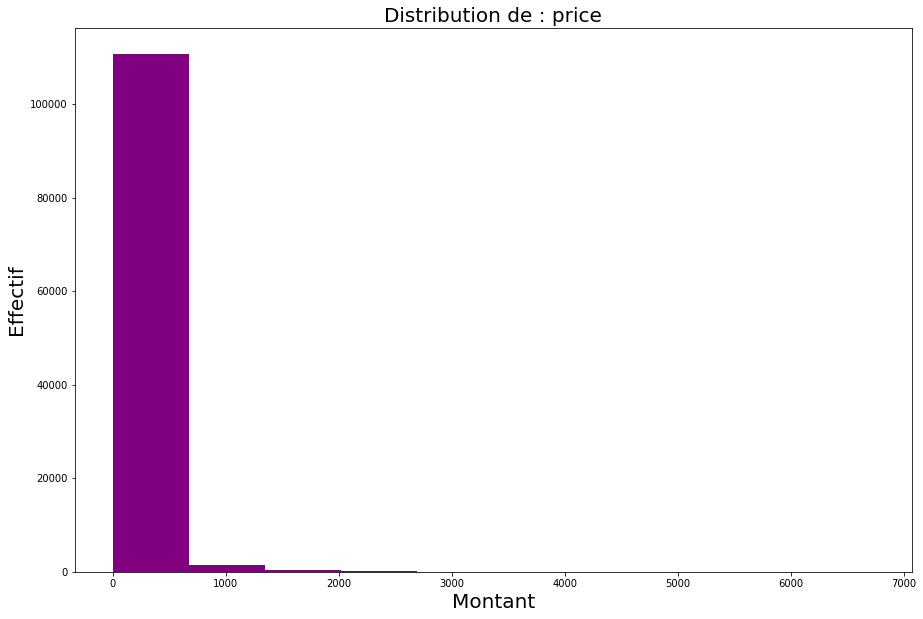

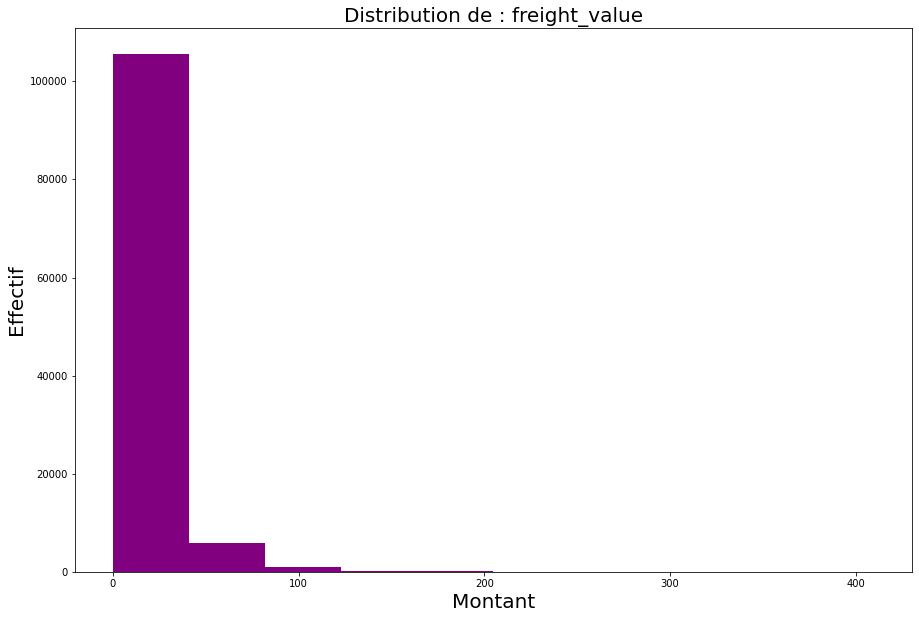

In [51]:
for col in order_items_df.select_dtypes('float64'):
    plt.figure(figsize=(15, 10))
    plt.hist(order_items_df[col], color='purple')
    plt.xlabel("Montant", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

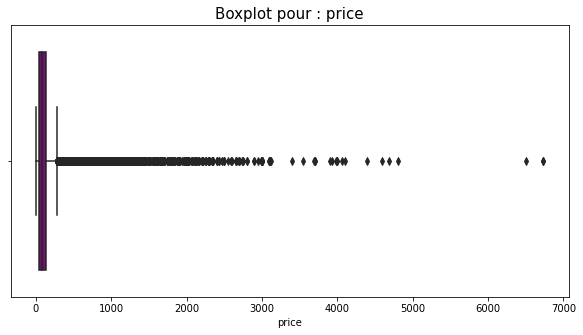

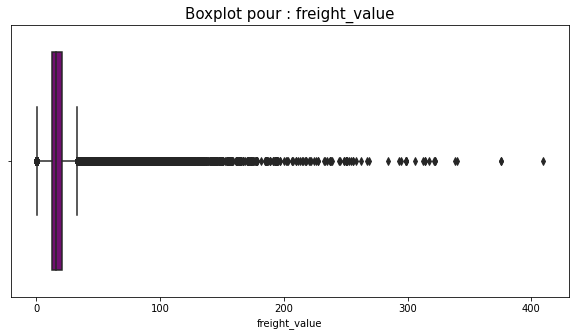

In [52]:
for col in order_items_df.select_dtypes('float64'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=order_items_df, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

##### Analyse des valeurs extrèmes

In [53]:
order_items_df[order_items_df['price'] == 6735]

,order_id,order_item_id,product_id,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,6735.0,194.31


In [54]:
order_items_df[order_items_df['freight_value'] == 409.68]

,order_id,order_item_id,product_id,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,979.0,409.68


In [55]:
order_items_df[order_items_df['order_item_id'] == 21]

,order_id,order_item_id,product_id,price,freight_value
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.8,6.57


In [56]:
order_items_df[order_items_df['order_id']
               == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,1.2,7.89


##### Les valeurs extrèmes ne sont pas aberrantes

#### Dataset nettoyé et analysé

In [57]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB


### Dataset Paiements des commandes

In [58]:
order_payments_df = pd.read_csv(root_path + "olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [59]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


##### Il n'y a pas de valeur manquante

In [60]:
order_payments_df.duplicated().sum()

0

##### Il n'y a pas de doublon de ligne entière

In [61]:
order_payments_df["order_id"].duplicated().sum()

4446

In [62]:
order_payments_df[order_payments_df["order_id"]
                  .duplicated()].sort_values(by='order_id').head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45


In [63]:
order_payments_df[order_payments_df['order_id']
                  == '009ac365164f8e06f59d18a08045f6c4']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25


##### Analyse de la structure des données :
- Une même commande peut être payée avec plusieurs moyens de paiement, ce qui correspond à plusieurs lignes avec même 'order_id' mais des 'payment_sequential' différents
- Une même commande peut être payée en plusieurs fois. Le nombre de paiements est indiqué dans la colonne 'payment_installments'

In [64]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Etude des distributions

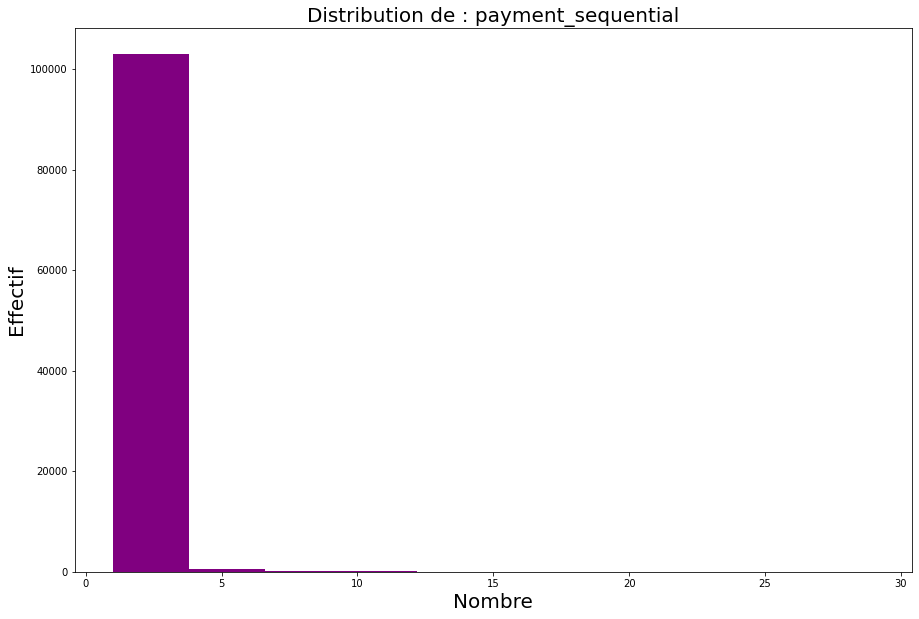

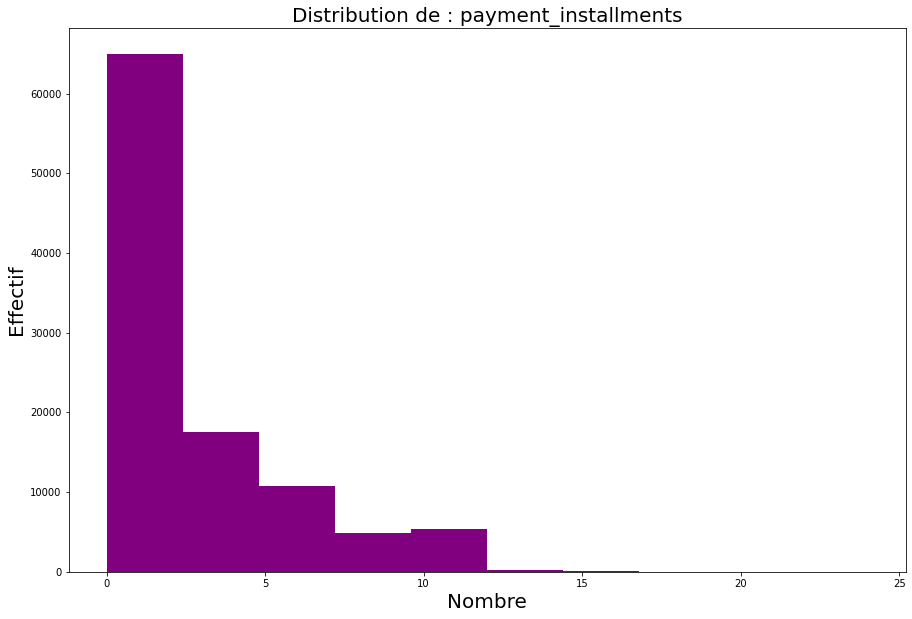

In [65]:
for col in order_payments_df.select_dtypes('int64'):
    plt.figure(figsize=(15, 10))
    plt.hist(order_payments_df[col], color='purple')
    plt.xlabel("Nombre", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

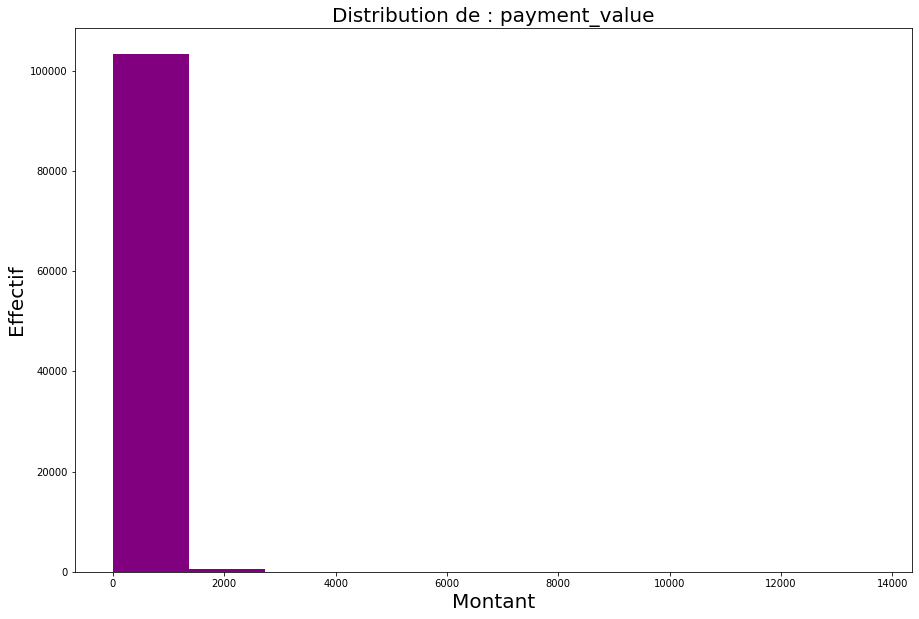

In [66]:
for col in order_payments_df.select_dtypes('float64'):
    plt.figure(figsize=(15, 10))
    plt.hist(order_payments_df[col], color='purple')
    plt.xlabel("Montant", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

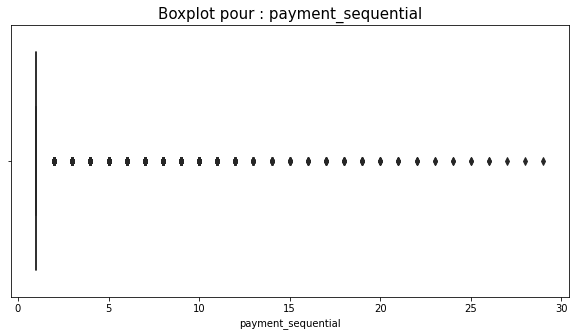

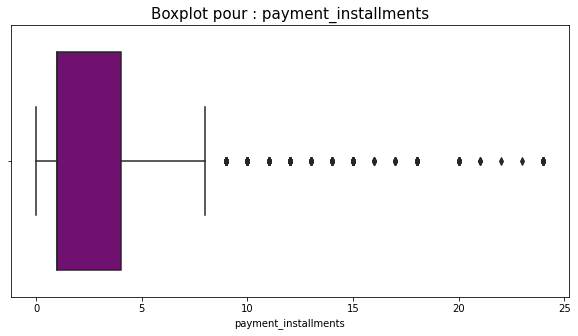

In [67]:
for col in order_payments_df.select_dtypes('int64'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=order_payments_df, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

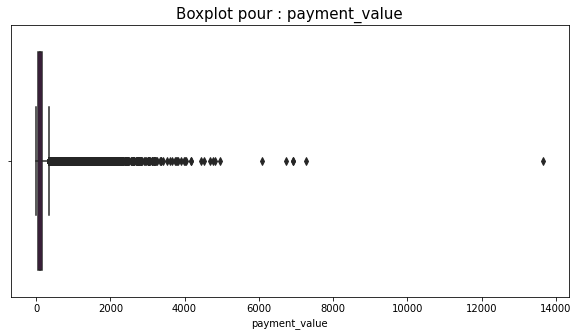

In [68]:
for col in order_payments_df.select_dtypes('float64'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=order_payments_df, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

In [69]:
print('payment_type', " : ")
print(order_payments_df['payment_type'].value_counts())
print()

payment_type  : 
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64



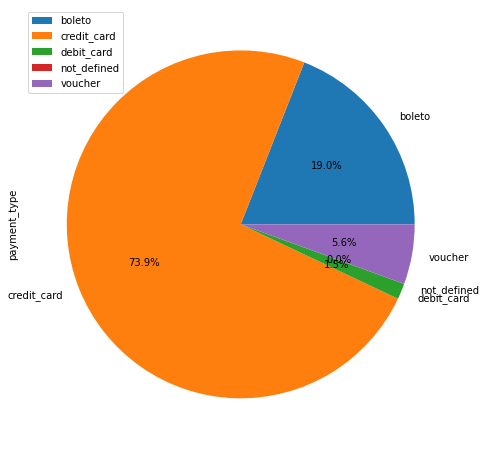

In [70]:
plt.figure(figsize=(8, 8))
order_payments_df['payment_type'].value_counts() \
    .sort_index().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.show()

##### Analyse des valeurs extrèmes

In [71]:
order_payments_df[order_payments_df['payment_value'] == 13664.080000]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


In [72]:
order_items_df[order_items_df['order_id']
               == '03caa2c082116e1d31e67e9ae3700499']

,order_id,order_item_id,product_id,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,1680.0,28.01


##### La valeur extrème 'payment_value' correspond à l'achat de 8 fois le même produit avec un prix élevé, ce n'est pas une valeur aberrante

In [73]:
order_payments_df[order_payments_df['payment_sequential'] == 29]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


In [74]:
order_items_df[order_items_df['order_id']
               == 'fa65dad1b0e818e3ccc5cb0e39231352']

,order_id,order_item_id,product_id,price,freight_value
110202,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,392.55,65.44


In [75]:
order_payments_df[order_payments_df['payment_installments'] == 24]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
2970,70b7e94ea46d3e8b5bc12a50186edaf0,1,credit_card,24,274.84
10791,859f516f2fc3f95772e63c5757ab0d5b,1,credit_card,24,609.56
12307,ff36cbc44b8f228e0449c92ef089c843,1,credit_card,24,756.49
18512,2b7dbe9be72b8f9733844c31055c0825,1,credit_card,24,345.39
21713,6ae2e8b8fac02522481d2a2f4ca4412c,1,credit_card,24,433.43
23024,90f864fe19d11549fa01eb81c4dd87e3,1,credit_card,24,588.58
36088,84d2098c97827c6327ed4d7be95e1fc8,1,credit_card,24,286.78
50401,ffb18bf111fa70edf316eb0390427986,1,credit_card,24,617.24
52846,63dbe0c8e63e5f1b4deec09d4f044a7f,1,credit_card,24,771.69
55094,fcbb6af360b31b05460c2c8e524588c0,1,credit_card,24,1194.38


In [76]:
order_items_df[order_items_df['order_id']
               == '70b7e94ea46d3e8b5bc12a50186edaf0']

,order_id,order_item_id,product_id,price,freight_value
49614,70b7e94ea46d3e8b5bc12a50186edaf0,1,59ebd2c07d59483d0855b5b3d5e18728,27.99,21.06
49615,70b7e94ea46d3e8b5bc12a50186edaf0,2,7ea0b63dc9b8264702f2d2c1533fb4ae,69.90,21.06
49616,70b7e94ea46d3e8b5bc12a50186edaf0,3,c1eee16d856657ad280936810ef3d080,69.99,3.15


##### Les valeurs extrèmes ne sont pas aberrantes

#### Dataset nettoyé et analysé

In [77]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Dataset Critiques des commandes

In [78]:
order_reviews_df = pd.read_csv(root_path + "olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [79]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [80]:
order_reviews_df.duplicated().sum()

0

##### Il n'y a pas de doublon de ligne entière

In [81]:
order_reviews_df["order_id"].duplicated().sum()

559

In [82]:
order_reviews_df["review_id"].duplicated().sum()

827

In [83]:
order_reviews_df[order_reviews_df["review_id"]
                 .duplicated()].sort_values(by='review_id').head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
47045,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
91399,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
93607,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
99942,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
96833,0254bd905dc677a6078990aad3331a36,331b367bdd766f3d1cf518777317b5d9,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44


##### Analyse de la structure des identifiants :
- Un même ordre, identifié par son 'order_id' peut avoir plusieurs critiques à des dates différentes. A une même commande peut donc correspondre plusieurs critiques
- Par contre il ne devrait pas y avoir plusieurs critiques avec le même 'review_id'

##### Suppression des doublons avec même 'review_id'

In [84]:
print("Data shape avant suppression des doublons 'review_id' : ",
      order_reviews_df.shape)

order_reviews_df.drop_duplicates(subset=["review_id"], inplace=True)

print("Data shape après suppression des doublons 'review_id' : ",
      order_reviews_df.shape)

Data shape avant suppression des doublons 'review_id' :  (100000, 7)
Data shape après suppression des doublons 'review_id' :  (99173, 7)


In [85]:
order_reviews_df["review_id"].duplicated().sum()

0

##### Il y a des valeurs manquantes sur les variables 'review_comment_title' et 'review_comment_message'
- La variable 'review_comment_title' est inutile pour l'analyse, nous la supprimons
- Pour la segmentation des clients, le message en lui même n'est pas utilisable, mais il pourrait être utile de connaître la longueur du message éventuel laissé par le client. On peut effectivement supposer que l'on puisse dégager une caractéristique d'un profil suivant la longeur du message de critique laissé. Ce traitement sera réalisé dans la partie de la création du Dataset centré sur le client

##### Nous supprimons la colonne 'review_comment_title' qui est inutile pour l'analyse

In [86]:
order_reviews_df.drop(columns=["review_comment_title"], inplace=True)

##### Nous conservons uniquement la 'review_creation_date' et supprimons la 'review_answer_timestamp' qui fait doublon pour l'analyse

In [87]:
order_reviews_df.drop(columns=["review_answer_timestamp"], inplace=True)

#### Etude des distributions

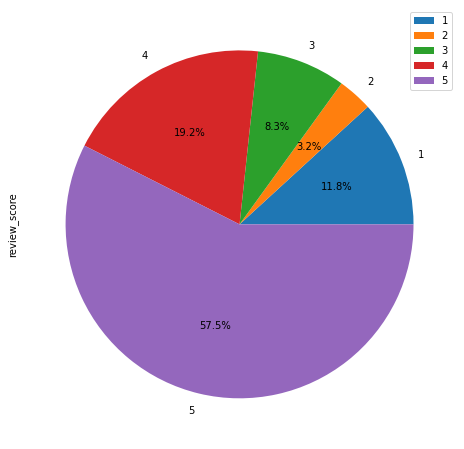

In [88]:
plt.figure(figsize=(8, 8))
order_reviews_df['review_score'].value_counts() \
    .sort_index().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.show()

##### Nous mettons les variables de type date au format date

In [89]:
order_reviews_df['review_creation_date'] = \
    pd.to_datetime(order_reviews_df['review_creation_date'])

#### Dataset nettoyé et analysé

In [90]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99173 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   review_id               99173 non-null  object        
 1   order_id                99173 non-null  object        
 2   review_score            99173 non-null  int64         
 3   review_comment_message  41431 non-null  object        
 4   review_creation_date    99173 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.5+ MB


### Dataset Produits

In [91]:
products_df = pd.read_csv(root_path + "olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [92]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [93]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Les données 'product_name_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm' et 'product_width_cm' ne nous seront pas utiles pour l'analyse, nous les supprimons

In [94]:
products_df.drop(columns=["product_name_lenght", "product_weight_g",
                          "product_length_cm", "product_height_cm",
                          "product_width_cm"], inplace=True)

In [95]:
products_df.duplicated().sum()

0

In [96]:
products_df["product_id"].duplicated().sum()

0

##### Il n'y a pas de doublon

In [97]:
categories_en_df = pd.read_csv(root_path +
                               "product_category_name_translation.csv")
categories_en_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [98]:
categories_en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


##### Nous allons merger les 2 dataset afin d'utiliser les noms de catégories en Anglais

In [99]:
products_df = pd.merge(products_df, categories_en_df,
                       how="inner",
                       on="product_category_name")

In [100]:
products_df.head()

,product_id,product_category_name,product_description_lenght,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,287.0,1.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,346.0,2.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,150.0,1.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,460.0,2.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,733.0,3.0,perfumery


In [101]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32328 non-null  object 
 1   product_category_name          32328 non-null  object 
 2   product_description_lenght     32328 non-null  float64
 3   product_photos_qty             32328 non-null  float64
 4   product_category_name_english  32328 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.5+ MB


##### Nous pouvons maintenant supprimer la colonne correspondant au nom des catégories en Portugais et renommer la colonne 'product_category_name_english' en 'product_category_name'

In [102]:
products_df.drop(columns=["product_category_name"], inplace=True)
products_df = products_df.rename(columns={"product_category_name_english":
                                          "product_category_name"})

In [103]:
products_df.head()

,product_id,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,287.0,1.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,346.0,2.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,150.0,1.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,460.0,2.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,733.0,3.0,perfumery


In [104]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32328 non-null  object 
 1   product_description_lenght  32328 non-null  float64
 2   product_photos_qty          32328 non-null  float64
 3   product_category_name       32328 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


##### Nous supprimons les quelques valeurs manquantes

In [105]:
products_df.dropna(inplace=True)

#### Etude des distributions

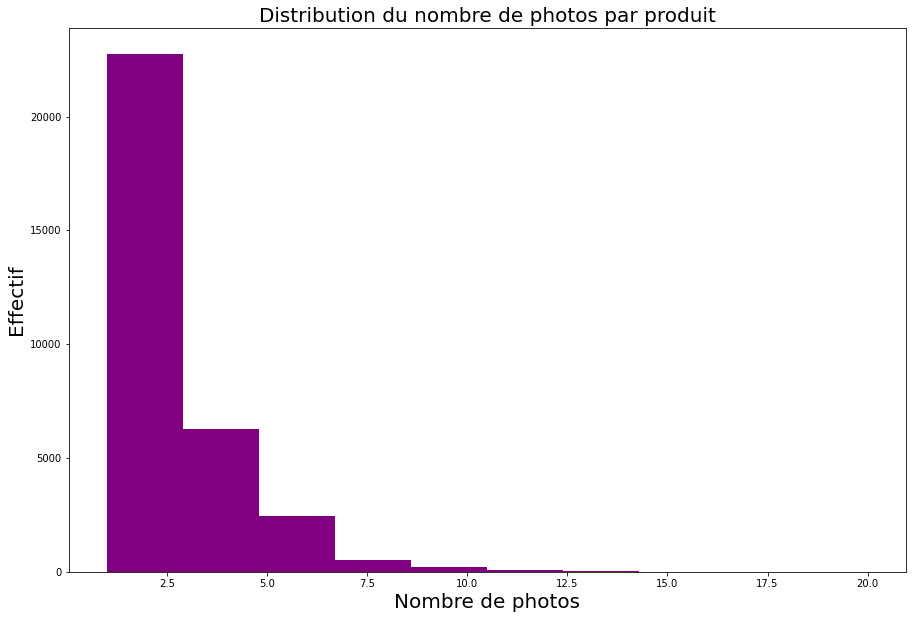

In [106]:
plt.figure(figsize=(15, 10))
plt.hist(products_df['product_photos_qty'], color='purple')
plt.xlabel("Nombre de photos", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du nombre de photos par produit", fontsize=20)
plt.show()

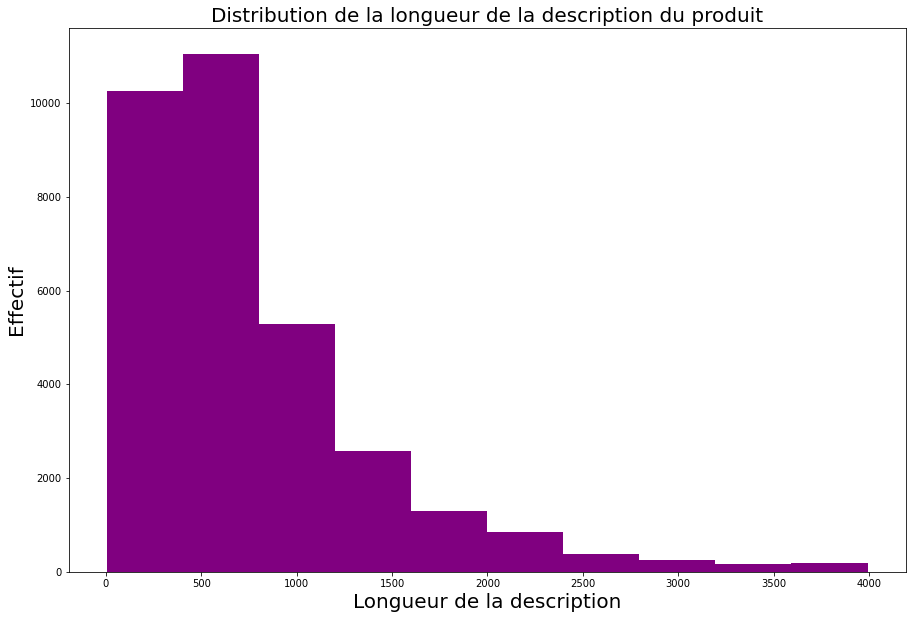

In [107]:
plt.figure(figsize=(15, 10))
plt.hist(products_df['product_description_lenght'], color='purple')
plt.xlabel("Longueur de la description", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution de la longueur de la description du produit",
          fontsize=20)
plt.show()

In [108]:
print('product_category_name', " : ")
print(products_df['product_category_name'].nunique())
print()

product_category_name  : 
71



In [109]:
print('product_category_name', " : ")
print(products_df['product_category_name'].unique())
print()

product_category_name  : 
['perfumery' 'art' 'sports_leisure' 'baby' 'housewares'
 'musical_instruments' 'cool_stuff' 'furniture_decor' 'home_appliances'
 'toys' 'bed_bath_table' 'construction_tools_safety'
 'computers_accessories' 'health_beauty' 'luggage_accessories'
 'garden_tools' 'office_furniture' 'auto' 'electronics' 'fashion_shoes'
 'telephony' 'stationery' 'fashion_bags_accessories' 'computers'
 'home_construction' 'watches_gifts' 'construction_tools_construction'
 'pet_shop' 'small_appliances' 'agro_industry_and_commerce'
 'furniture_living_room' 'signaling_and_security' 'air_conditioning'
 'consoles_games' 'books_general_interest' 'costruction_tools_tools'
 'fashion_underwear_beach' 'fashion_male_clothing'
 'kitchen_dining_laundry_garden_furniture'
 'industry_commerce_and_business' 'fixed_telephony'
 'construction_tools_lights' 'books_technical' 'home_appliances_2'
 'party_supplies' 'drinks' 'market_place' 'la_cuisine'
 'costruction_tools_garden' 'fashio_female_clothing' 'ho

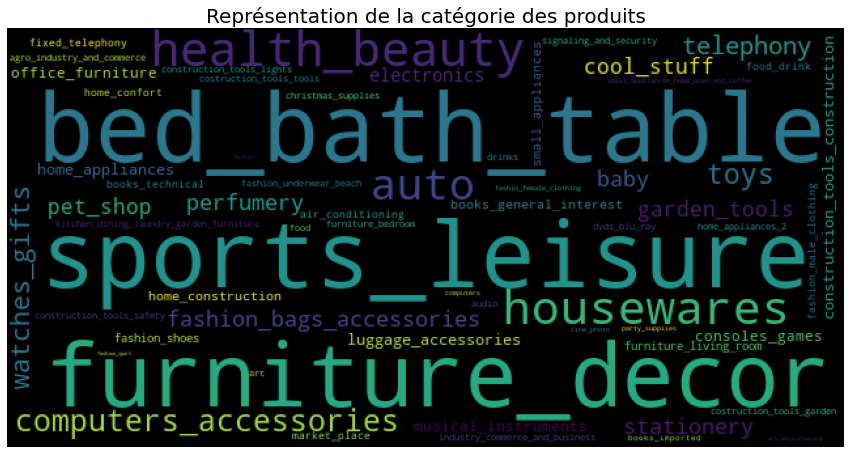

In [110]:
var_occurences = products_df['product_category_name'].value_counts().to_dict()
wordcloud = WordCloud(width=640, height=320) \
    .generate_from_frequencies(var_occurences)
plt.figure(figsize=(15, 10))
plt.title("Représentation de la catégorie des produits", fontsize=20)
plt.imshow(wordcloud)
_ = plt.axis("off")

#### Dataset nettoyé et analysé

In [111]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32328 non-null  object 
 1   product_description_lenght  32328 non-null  float64
 2   product_photos_qty          32328 non-null  float64
 3   product_category_name       32328 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


### Dataset Vendeurs

In [112]:
sellers_df = pd.read_csv(root_path + "olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [113]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


##### Les données sur les vendeurs ne nous seront pas utiles pour la segmentation des clients

## 2 - Création d'un Dataset global en regroupant les différents Dataset

### COMMANDES

#### Commandes et articles

In [114]:
df_orders_items = pd.merge(orders_df, order_items_df,
                           how="inner",
                           on="order_id")

In [115]:
df_orders_items.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


In [116]:
df_orders_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110189 entries, 0 to 110188
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110189 non-null  object        
 1   customer_id                    110189 non-null  object        
 2   order_purchase_timestamp       110189 non-null  datetime64[ns]
 3   order_delivered_customer_date  110189 non-null  datetime64[ns]
 4   order_item_id                  110189 non-null  int64         
 5   product_id                     110189 non-null  object        
 6   price                          110189 non-null  float64       
 7   freight_value                  110189 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 7.6+ MB


#### Commandes, articles et paiements

In [117]:
df_orders_items_payments = pd.merge(df_orders_items, order_payments_df,
                                    how="inner",
                                    on="order_id")

In [118]:
df_orders_items_payments.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,1,credit_card,3,179.12


In [119]:
df_orders_items_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115027 entries, 0 to 115026
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115027 non-null  object        
 1   customer_id                    115027 non-null  object        
 2   order_purchase_timestamp       115027 non-null  datetime64[ns]
 3   order_delivered_customer_date  115027 non-null  datetime64[ns]
 4   order_item_id                  115027 non-null  int64         
 5   product_id                     115027 non-null  object        
 6   price                          115027 non-null  float64       
 7   freight_value                  115027 non-null  float64       
 8   payment_sequential             115027 non-null  int64         
 9   payment_type                   115027 non-null  object        
 10  payment_installments           115027 non-null  int64         
 11  

### Commandes, articles, paiements et critiques

In [120]:
df_orders_items_payments_reviews = pd.merge(df_orders_items_payments,
                                            order_reviews_df,
                                            how="inner",
                                            on="order_id")

In [121]:
df_orders_items_payments_reviews.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,8.72,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,8.72,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,8.72,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito bom o produto.,2018-08-08
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,2018-08-18


In [122]:
df_orders_items_payments_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114784 entries, 0 to 114783
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114784 non-null  object        
 1   customer_id                    114784 non-null  object        
 2   order_purchase_timestamp       114784 non-null  datetime64[ns]
 3   order_delivered_customer_date  114784 non-null  datetime64[ns]
 4   order_item_id                  114784 non-null  int64         
 5   product_id                     114784 non-null  object        
 6   price                          114784 non-null  float64       
 7   freight_value                  114784 non-null  float64       
 8   payment_sequential             114784 non-null  int64         
 9   payment_type                   114784 non-null  object        
 10  payment_installments           114784 non-null  int64         
 11  

#### Dataset global des commandes :

In [123]:
df_orders = df_orders_items_payments_reviews

### CLIENTS ET COMMANDES

In [124]:
df_orders_customers = pd.merge(customers_df, df_orders,
                               how="inner",
                               on="customer_id")

In [125]:
df_orders_customers.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,2017-05-26
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-29 12:41:19,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,2018-01-30
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-06-14 17:58:51,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,2018-06-15
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-28 16:04:25,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,2018-03-29
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-08-09 20:55:48,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,O baratheon è esxelente Amo adoro o baratheon,2018-08-10


In [126]:
df_orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114784 entries, 0 to 114783
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    114784 non-null  object        
 1   customer_unique_id             114784 non-null  object        
 2   customer_state                 114784 non-null  object        
 3   order_id                       114784 non-null  object        
 4   order_purchase_timestamp       114784 non-null  datetime64[ns]
 5   order_delivered_customer_date  114784 non-null  datetime64[ns]
 6   order_item_id                  114784 non-null  int64         
 7   product_id                     114784 non-null  object        
 8   price                          114784 non-null  float64       
 9   freight_value                  114784 non-null  float64       
 10  payment_sequential             114784 non-null  int64         
 11  

### CLIENTS, COMMANDES ET PRODUITS

In [127]:
df_customers_orders_products = pd.merge(df_orders_customers, products_df,
                                        how="inner",
                                        on="product_id")

In [128]:
df_customers_orders_products.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,2017-05-26,1141.0,1.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,1141.0,1.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,1141.0,1.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",2017-05-27,1141.0,1.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,2018-03-01,1141.0,1.0,office_furniture


In [129]:
df_customers_orders_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113131 entries, 0 to 113130
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113131 non-null  object        
 1   customer_unique_id             113131 non-null  object        
 2   customer_state                 113131 non-null  object        
 3   order_id                       113131 non-null  object        
 4   order_purchase_timestamp       113131 non-null  datetime64[ns]
 5   order_delivered_customer_date  113131 non-null  datetime64[ns]
 6   order_item_id                  113131 non-null  int64         
 7   product_id                     113131 non-null  object        
 8   price                          113131 non-null  float64       
 9   freight_value                  113131 non-null  float64       
 10  payment_sequential             113131 non-null  int64         
 11  

In [130]:
df_customers_orders_products[
    df_customers_orders_products["customer_unique_id"]
    .duplicated()].sort_values(by='customer_unique_id') \
    .head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category_name
77546,a81ebb9b32f102298c0c89635b4b3154,00053a61a98854899e70ed204dd4bafe,PR,44e608f2db00c74a1fe329de44416a4e,2018-02-28 11:15:41,2018-03-16 19:02:51,1,62984ea1bba7fcea1f5b57084d3bf885,191.00,18.59,1,credit_card,3,419.18,333a6ca3cdb01f5f00e3e6be1f1236e1,1,Olá! Comprei dois potes de whey e chegou apena...,2018-03-17,190.0,1.0,sports_leisure
37396,e36917a47d5bf39bd3f38bcafb3d438f,000bfa1d2f1a41876493be685390d6d3,SP,fd61441ba2a7b57e6342862e779b10b0,2017-09-29 14:46:58,2017-10-13 13:50:07,1,bb15f9ba2ec6e36ab6c9e88d17430d64,35.00,11.85,1,credit_card,4,46.85,24ad2fc85ec000ba4fbfd9841d9a1972,4,"Tem que retirar nos correios, muito incômodo",2017-10-14,156.0,1.0,fashion_bags_accessories
64239,455f2e2988eaf87d7e2ba33b0a57969f,000de6019bb59f34c099a907c151d855,SP,c6d61340bd8baeedca7cc8e7f7ec07e9,2017-08-17 19:10:33,2017-08-21 19:18:42,2,9e572ff4654f7064419d97a891a8b0fc,139.90,17.33,1,credit_card,4,257.44,49af8d8f5a31674c3474ab9ea125db04,2,A loja recomendo mas não o produto que escolhi...,2017-08-22,167.0,1.0,bed_bath_table
65022,8866a052aebe7f7cee97bace65b379b2,000e309254ab1fc5ba99dd469d36bdb4,GO,c5d3fae065a8090bae39f4f34b14cd06,2018-06-25 09:53:57,2018-07-09 23:04:31,1,b73091f98b819cf7a339f74ece86aa4b,59.90,18.52,2,voucher,1,69.89,0403937c18bf4fc4112ee3b7b9316c35,3,NaN,2018-07-10,423.0,1.0,fashion_underwear_beach
32799,4b95f958af9c866353ae1108d8ebd023,000fbf0473c10fc1ab6f8d2d286ce20c,SP,87440e08790d85796f5b8bc9f5ed2707,2018-07-26 09:43:52,2018-08-03 16:04:33,2,38021cef829efa264df6f9d21c4df6e9,119.87,19.14,1,boleto,1,362.38,b6ebd8ff503e058bc1205ee501274c1a,5,NaN,2018-08-04,182.0,1.0,musical_instruments


### Dataset global et propre utilisé pour l'analyse

In [131]:
df_dataset = df_customers_orders_products.copy(deep=True)

In [132]:
df_dataset.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,2017-05-26,1141.0,1.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,1141.0,1.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,1141.0,1.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",2017-05-27,1141.0,1.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,2018-03-01,1141.0,1.0,office_furniture


In [133]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113131 entries, 0 to 113130
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113131 non-null  object        
 1   customer_unique_id             113131 non-null  object        
 2   customer_state                 113131 non-null  object        
 3   order_id                       113131 non-null  object        
 4   order_purchase_timestamp       113131 non-null  datetime64[ns]
 5   order_delivered_customer_date  113131 non-null  datetime64[ns]
 6   order_item_id                  113131 non-null  int64         
 7   product_id                     113131 non-null  object        
 8   price                          113131 non-null  float64       
 9   freight_value                  113131 non-null  float64       
 10  payment_sequential             113131 non-null  int64         
 11  

#### On sauvegarde ce DataFrame qui nous reservira dans la seconde partie

In [134]:
df_dataset.to_csv(root_path + "olist_dataset.csv", index=False)

## 3 - Feature Engineering : Création d'un Dataset centré sur les clients

- Traitement de la localisation des clients


- Traitement des messages des critiques laissés par les clients


- Traitement des catégorie des produits achetés par les clients


- Traitement des temps de livraison aux clients


##### Informations pour chaque client : 1 ligne = 1 client (identifié par son 'customer_unique_id')
   - Etat d'habitation
   - Nombre de commande(s)
   - Prix moyen
   - Frais de port moyen
   - Montant de paiement
   - Moyenne des séquences de paiements
   - Moyenne du nombre de paiements
   - Mode du type de paiement
   - Moyenne des notations pour les critiques
   - Moyenne de la longueur des messages laissés pour les critiques
   - Moyenne de la longueur de la descriptions texte des produits
   - Moyenne du nombre de photos pour les produits
   - Temps moyen de livraison
   - Nombre de jours depuis la dernière commande
   - Catégories des produits achetés

### Traitement de la localisation des clients

In [135]:
df_dataset_location = df_dataset.groupby("customer_unique_id") \
            .agg(customer_state_mode=pd.NamedAgg(column="customer_state",
                                                 aggfunc="nunique"))
df_dataset_location.head()

,customer_state_mode
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


In [136]:
df_dataset_location[df_dataset_location['customer_state_mode'] != 1]

,customer_state_mode
customer_unique_id,
1f90117a847636892e3c5bf569f2ac68,2
2410195f6521688005612363835a2671,2
2c45ab66a3dae52960147e76a35740ff,2
2c6a91479a7dc00d8c9d650d8dee88ca,2
408aee96c75632a92e5079eee61da399,2
5275b2f97b9c995d3d05a58610c0bb67,2
547d0504ca415eb4864fa3030f73d3f3,2
5cbfdb85ec130898108b32c50d619c39,2
62a25a159f9fd2ab7c882d9407f49aa9,2


##### On remarque que des clients avec le même 'customer_unique_id' ont plusieurs 'customer_city' ou 'customer_state' différents
##### Nous retenons la valeur la plus fréquente

In [137]:
df_dataset_customers_location = df_dataset.groupby("customer_unique_id") \
            .agg(customer_state_mode=pd.NamedAgg(
                        column="customer_state",
                        aggfunc=lambda x: pd.Series.mode(x)[0]))
df_dataset_customers_location.head()

,customer_state_mode
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,SP
0000b849f77a49e4a4ce2b2a4ca5be3f,SP
0000f46a3911fa3c0805444483337064,SC
0000f6ccb0745a6a4b88665a16c9f078,PA
0004aac84e0df4da2b147fca70cf8255,SP


### Traitement des messages des critiques laissées par les clients

##### Il y a des valeurs manquantes sur les variables 'review_comment_title' et 'review_comment_message'
- Pour la segmentation des clients, le message en lui même n'est pas utilisable, mais il pourrait être utile de connaître la longueur du message éventuel laissé par le client. On peut effectivement supposer que l'on puisse dégager une caractéristique d'un profil suivant la longeur du message de critique laissé

- Pour prendre en compte la variable 'review_comment_message', nous allons donc remplacer le message par la longueur de celui-ci (0 signifie donc qu'il n'y a pas de commentaire)

##### Modification de la colonne 'review_comment_message'

In [138]:
df_dataset['review_comment_message'].fillna("", inplace=True)

In [139]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113131 entries, 0 to 113130
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113131 non-null  object        
 1   customer_unique_id             113131 non-null  object        
 2   customer_state                 113131 non-null  object        
 3   order_id                       113131 non-null  object        
 4   order_purchase_timestamp       113131 non-null  datetime64[ns]
 5   order_delivered_customer_date  113131 non-null  datetime64[ns]
 6   order_item_id                  113131 non-null  int64         
 7   product_id                     113131 non-null  object        
 8   price                          113131 non-null  float64       
 9   freight_value                  113131 non-null  float64       
 10  payment_sequential             113131 non-null  int64         
 11  

In [140]:
df_dataset.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,,2017-05-26,1141.0,1.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,1141.0,1.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,1141.0,1.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",2017-05-27,1141.0,1.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,2018-03-01,1141.0,1.0,office_furniture


In [141]:
df_dataset['review_comment_message'] = \
    df_dataset['review_comment_message'].apply(lambda x: len(x))

In [142]:
df_dataset.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,0,2017-05-26,1141.0,1.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,94,2017-05-27,1141.0,1.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,23,2018-03-01,1141.0,1.0,office_furniture


### Traitement des catégorie des produits achetés par les clients

##### Le nombre de catégories est trop important et disparate pour être utilisé dans l'analyse.
##### Nous allons les regrouper dans les catégories ci-dessous :
- Fashion, clothing and accessories
- Health and Beauty
- Toys and baby equipment
- Books, CDs and other physical media
- Groceries, food and drink
- Technology (including phones and computers)
- Home and furniture
- Flowers and gifts
- Sport and Leisures
- Other

In [145]:
df_dataset['product_category'] = \
    np.where((
        df_dataset['product_category_name']
        .str.contains("fashion|luggage") == True),
        'fashion_clothing_accessories',
    np.where((
        df_dataset['product_category_name']
        .str.contains("health|beauty|perfum") == True),
        'health_beauty',
    np.where((
        df_dataset['product_category_name']
        .str.contains("toy|baby|diaper") == True),
        'toys_baby',
    np.where((
        df_dataset['product_category_name']
        .str.contains("book|cd|dvd|media") == True),
        'books_cds_media',
    np.where((
        df_dataset['product_category_name']
        .str.contains("grocer|food|drink") == True),
        'groceries_food_drink',
    np.where((
        df_dataset['product_category_name']
        .str.contains("phone|computer|tablet|electronic|console") == True),
        'technology',
    np.where((df_dataset['product_category_name']
        .str.contains("home|furniture|garden|bath|house|appliance") == True),
        'home_furniture',
    np.where((df_dataset['product_category_name']
        .str.contains("flow|gift|stuff") == True),
        'flowers_gifts',
    np.where((df_dataset['product_category_name']
        .str.contains("sport|leisure") == True),
        'sport_leisures',
    'other')))))))))

In [146]:
%pycodestyle_on

In [148]:
print('product_category', " : ")
print(df_dataset['product_category'].unique())
print()

product_category  : 
['home_furniture' 'sport_leisures' 'technology' 'other' 'health_beauty'
 'toys_baby' 'flowers_gifts' 'groceries_food_drink'
 'fashion_clothing_accessories' 'books_cds_media']



In [149]:
df_dataset.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category_name,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,0,2017-05-26,1141.0,1.0,office_furniture,home_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,office_furniture,home_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,office_furniture,home_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,94,2017-05-27,1141.0,1.0,office_furniture,home_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,23,2018-03-01,1141.0,1.0,office_furniture,home_furniture


##### Nous supprimons la colonne 'product_category_name' qui ne nous est plus utile

In [150]:
df_dataset.drop(columns=["product_category_name"], inplace=True)

In [151]:
df_dataset.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,0,2017-05-26,1141.0,1.0,home_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,home_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,home_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,94,2017-05-27,1141.0,1.0,home_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,23,2018-03-01,1141.0,1.0,home_furniture


##### Nombre de produits achetés par catégorie pour chaque client

In [152]:
df_customers_categories = df_dataset.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()
df_customers_categories.fillna(0, inplace=True)
df_customers_categories.columns = df_customers_categories.columns.droplevel(0)

INFO:pycodestyle:1:80: E501 line too long (89 > 79 characters)


In [153]:
df_customers_categories

product_category,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport_leisures,technology,toys_baby
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Traitement des temps de livraison aux clients

##### Calcul des temps de livraison

In [154]:
df_dataset['days_to_delivery'] = \
    ((df_dataset['order_delivered_customer_date']
      - df_dataset['order_purchase_timestamp']).dt.days)

In [155]:
df_dataset.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,product_category,days_to_delivery
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,0,2017-05-26,1141.0,1.0,home_furniture,8
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,home_furniture,18
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,59,2017-11-29,1141.0,1.0,home_furniture,18
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,94,2017-05-27,1141.0,1.0,home_furniture,18
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,23,2018-03-01,1141.0,1.0,home_furniture,25


##### Prise en compte de la dernière date du dataset pour référence des dates

In [156]:
last_date = df_dataset['order_delivered_customer_date'].max()
last_date

Timestamp('2018-10-17 13:22:46')

### Création du Dataset centré sur les clients

In [157]:
df_dataset_customers = df_dataset.groupby("customer_unique_id")\
            .agg(customer_state_mode=pd.NamedAgg(column="customer_state",
                 aggfunc=lambda x: pd.Series.mode(x)[0]),
                 orders_number=pd.NamedAgg(
                     column="order_id",
                     aggfunc="nunique"),
                 price_mean=pd.NamedAgg(
                     column="price",
                     aggfunc="mean"),
                 freight_value_mean=pd.NamedAgg(
                     column="freight_value",
                     aggfunc="mean"),
                 payment_value_mean=pd.NamedAgg(
                     column="payment_value",
                     aggfunc="mean"),
                 payment_sequential_mean=pd.NamedAgg(
                     column="payment_sequential",
                     aggfunc="mean"),
                 payment_installments_mean=pd.NamedAgg(
                     column="payment_installments",
                     aggfunc="mean"),
                 payment_type_mode=pd.NamedAgg(
                     column="payment_type",
                     aggfunc=lambda x: pd.Series.mode(x)[0]),
                 review_score_mean=pd.NamedAgg(
                     column="review_score",
                     aggfunc="mean"),
                 review_comment_message_length_mean=pd.NamedAgg(
                     column="review_comment_message",
                     aggfunc="mean"),
                 product_description_lenght_mean=pd.NamedAgg(
                     column="product_description_lenght",
                     aggfunc="mean"),
                 product_photos_qty_mean=pd.NamedAgg(
                     column="product_photos_qty",
                     aggfunc="mean"),
                 days_to_delivery_mean=pd.NamedAgg(
                     column="days_to_delivery",
                     aggfunc="mean"),
                 last_command_nb_days=('order_purchase_timestamp',
                                       lambda x: (last_date - x.max()).days))
df_dataset_customers.head()

,customer_state_mode,orders_number,price_mean,freight_value_mean,payment_value_mean,payment_sequential_mean,payment_installments_mean,payment_type_mode,review_score_mean,review_comment_message_length_mean,product_description_lenght_mean,product_photos_qty_mean,days_to_delivery_mean,last_command_nb_days
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,1,129.90,12.00,141.90,1.0,8.0,credit_card,5.0,111.0,236.0,1.0,6.0,160
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1,18.90,8.29,27.19,1.0,1.0,credit_card,4.0,0.0,635.0,1.0,3.0,163
0000f46a3911fa3c0805444483337064,SC,1,69.00,17.22,86.22,1.0,8.0,credit_card,3.0,0.0,177.0,3.0,25.0,585
0000f6ccb0745a6a4b88665a16c9f078,PA,1,25.99,17.63,43.62,1.0,4.0,credit_card,4.0,12.0,1741.0,5.0,20.0,369
0004aac84e0df4da2b147fca70cf8255,SP,1,180.00,16.89,196.89,1.0,6.0,credit_card,5.0,0.0,794.0,3.0,13.0,336


In [158]:
df_customers_categories

product_category,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport_leisures,technology,toys_baby
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [159]:
df_dataset_customers_categories = \
                       pd.merge(df_dataset_customers, df_customers_categories,
                                how="inner",
                                on="customer_unique_id")
df_dataset_customers_categories.head()

,customer_state_mode,orders_number,price_mean,freight_value_mean,payment_value_mean,payment_sequential_mean,payment_installments_mean,payment_type_mode,review_score_mean,review_comment_message_length_mean,product_description_lenght_mean,product_photos_qty_mean,days_to_delivery_mean,last_command_nb_days,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport_leisures,technology,toys_baby
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,1,129.90,12.00,141.90,1.0,8.0,credit_card,5.0,111.0,236.0,1.0,6.0,160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1,18.90,8.29,27.19,1.0,1.0,credit_card,4.0,0.0,635.0,1.0,3.0,163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,SC,1,69.00,17.22,86.22,1.0,8.0,credit_card,3.0,0.0,177.0,3.0,25.0,585,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,PA,1,25.99,17.63,43.62,1.0,4.0,credit_card,4.0,12.0,1741.0,5.0,20.0,369,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,SP,1,180.00,16.89,196.89,1.0,6.0,credit_card,5.0,0.0,794.0,3.0,13.0,336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Copie et sauvegarde du Dataset Clients

In [160]:
df_dataset_customers = df_dataset_customers_categories.copy(deep=True)
df_dataset_customers

,customer_state_mode,orders_number,price_mean,freight_value_mean,payment_value_mean,payment_sequential_mean,payment_installments_mean,payment_type_mode,review_score_mean,review_comment_message_length_mean,product_description_lenght_mean,product_photos_qty_mean,days_to_delivery_mean,last_command_nb_days,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport_leisures,technology,toys_baby
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,1,129.90,12.00,141.90,1.0,8.0,credit_card,5.0,111.0,236.0,1.0,6.0,160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1,18.90,8.29,27.19,1.0,1.0,credit_card,4.0,0.0,635.0,1.0,3.0,163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,SC,1,69.00,17.22,86.22,1.0,8.0,credit_card,3.0,0.0,177.0,3.0,25.0,585,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,PA,1,25.99,17.63,43.62,1.0,4.0,credit_card,4.0,12.0,1741.0,5.0,20.0,369,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,SP,1,180.00,16.89,196.89,1.0,6.0,credit_card,5.0,0.0,794.0,3.0,13.0,336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,PE,1,785.00,248.71,2067.42,1.0,10.0,credit_card,5.0,0.0,478.5,1.0,27.0,495,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,BA,1,64.89,19.69,84.58,1.0,1.0,credit_card,4.0,0.0,506.0,2.0,30.0,310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ffff371b4d645b6ecea244b27531430a,MT,1,89.90,22.56,112.46,1.0,1.0,credit_card,5.0,0.0,716.0,5.0,14.0,616,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [161]:
df_dataset_customers.to_csv("olist_dataset_customers.csv", index=False)

## 4 - Analyse exploratoire du Dataset centré sur les clients

### Volumétrie des données : nombre de lignes et de colonnes

In [185]:
data_size = df_dataset_customers.shape
nb_rows = data_size[0]
nb_columns = data_size[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 92034
Nombre de colonnes : 24


In [186]:
df_dataset_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92034 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_state_mode                 92034 non-null  object 
 1   orders_number                       92034 non-null  int64  
 2   price_mean                          92034 non-null  float64
 3   freight_value_mean                  92034 non-null  float64
 4   payment_value_mean                  92034 non-null  float64
 5   payment_sequential_mean             92034 non-null  float64
 6   payment_installments_mean           92034 non-null  float64
 7   payment_type_mode                   92034 non-null  object 
 8   review_score_mean                   92034 non-null  float64
 9   review_comment_message_length_mean  92034 non-null  float64
 10  product_description_lenght_mean     92034 non-null  f

In [187]:
df_dataset_customers.dtypes.value_counts()

float64    20
object      2
int64       2
dtype: int64

### Etude des variables qualitatives

#### Indicateurs statistiques

#### Nombre de modalités

In [188]:
for col in df_dataset_customers.select_dtypes('object'):
    print(col, " : ")
    print(df_dataset_customers[col].nunique())
    print()

customer_state_mode  : 
27

payment_type_mode  : 
4



#### Liste des modalités

In [189]:
for col in df_dataset_customers.select_dtypes('object'):
    print(col, " : ")
    print(df_dataset_customers[col].unique())
    print()

customer_state_mode  : 
['SP' 'SC' 'PA' 'PR' 'RJ' 'MA' 'ES' 'RS' 'MG' 'GO' 'DF' 'BA' 'MT' 'SE'
 'TO' 'PE' 'CE' 'AL' 'AC' 'PI' 'PB' 'RN' 'AM' 'MS' 'AP' 'RO' 'RR']

payment_type_mode  : 
['credit_card' 'boleto' 'debit_card' 'voucher']



#### Nombre de données pour chaque modalité

In [190]:
for col in df_dataset_customers.select_dtypes('object'):
    print(col, " : ")
    print(df_dataset_customers[col].value_counts)
    print()

customer_state_mode  : 
<bound method IndexOpsMixin.value_counts of customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    SP
0000b849f77a49e4a4ce2b2a4ca5be3f    SP
0000f46a3911fa3c0805444483337064    SC
0000f6ccb0745a6a4b88665a16c9f078    PA
0004aac84e0df4da2b147fca70cf8255    SP
                                    ..
fffcf5a5ff07b0908bd4e2dbc735a684    PE
fffea47cd6d3cc0a88bd621562a9d061    BA
ffff371b4d645b6ecea244b27531430a    MT
ffff5962728ec6157033ef9805bacc48    ES
ffffd2657e2aad2907e67c3e9daecbeb    PR
Name: customer_state_mode, Length: 92034, dtype: object>

payment_type_mode  : 
<bound method IndexOpsMixin.value_counts of customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    credit_card
0000b849f77a49e4a4ce2b2a4ca5be3f    credit_card
0000f46a3911fa3c0805444483337064    credit_card
0000f6ccb0745a6a4b88665a16c9f078    credit_card
0004aac84e0df4da2b147fca70cf8255    credit_card
                                       ...     
fffcf5a5ff07b0908bd4e2dbc735a684    credit_card
fffea

### Distributions

##### Etat des clients

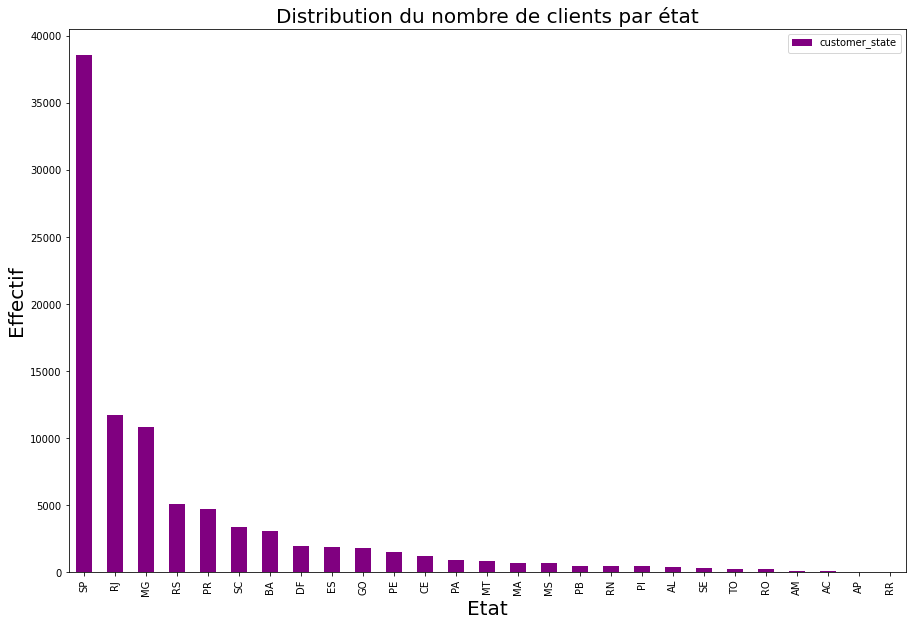

In [191]:
plt.figure(figsize=(15, 10))
df_dataset_customers['customer_state_mode'].value_counts() \
    .plot.bar(label='customer_state', color='purple')
plt.xlabel("Etat", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du nombre de clients par état", fontsize=20)
plt.legend()
plt.show()

##### Type de paiement

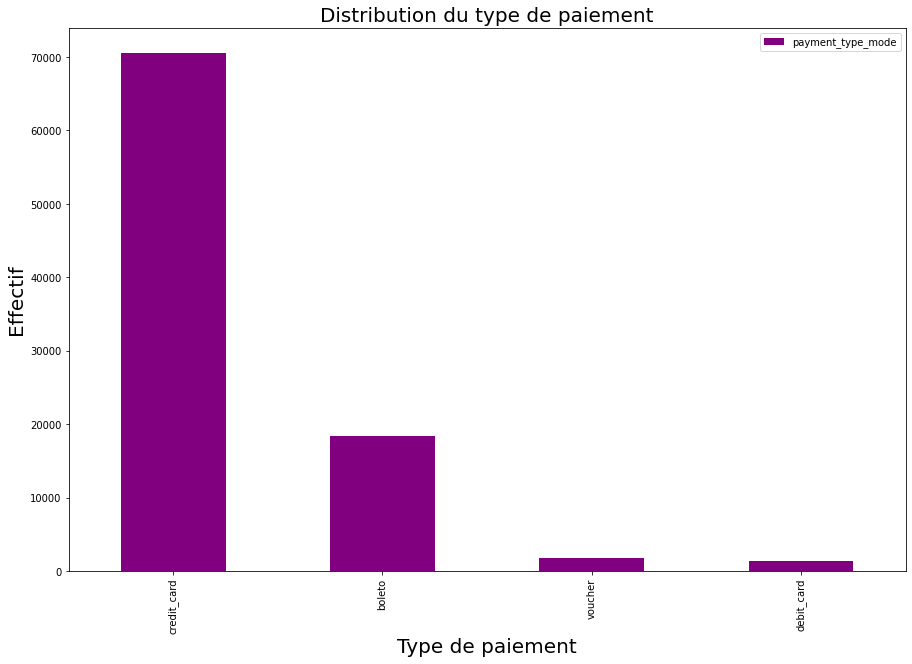

In [192]:
plt.figure(figsize=(15, 10))
df_dataset_customers['payment_type_mode'].value_counts() \
    .plot.bar(label='payment_type_mode', color='purple')
plt.xlabel("Type de paiement", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du type de paiement", fontsize=20)
plt.legend()
plt.show()

### Etude des variables quantitatives

#### Indicateurs statistiques

In [193]:
df_dataset_customers.describe()

,orders_number,price_mean,freight_value_mean,payment_value_mean,payment_sequential_mean,payment_installments_mean,review_score_mean,review_comment_message_length_mean,product_description_lenght_mean,product_photos_qty_mean,days_to_delivery_mean,last_command_nb_days,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport_leisures,technology,toys_baby
count,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.00000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000
mean,1.028457,125.848304,20.220455,157.917493,1.022819,2.904216,4.142103,28.163277,795.174561,2.256266,12.099086,285.173349,0.010355,0.041365,0.108721,0.012539,0.14374,0.408686,0.198079,0.094595,0.131680,0.079471
std,0.192389,189.982559,15.766495,216.837677,0.184478,2.681758,1.289985,48.154893,650.012331,1.736945,9.553703,152.557623,0.113669,0.242979,0.368688,0.147766,0.43588,0.850826,0.515017,0.366713,0.445639,0.319398
min,1.000000,0.850000,0.000000,1.856818,1.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,42.900000,13.370000,60.750000,1.000000,1.000000,4.000000,0.000000,354.000000,1.000000,6.000000,162.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,79.000000,16.430000,103.515000,1.000000,2.000000,5.000000,0.000000,611.000000,2.000000,10.000000,266.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,139.900000,21.230000,175.098750,1.000000,4.000000,5.000000,41.000000,998.000000,3.000000,15.000000,393.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,6735.000000,409.680000,13664.080000,13.500000,24.000000,5.000000,208.000000,3992.000000,20.000000,209.000000,743.000000,6.000000,12.000000,12.000000,11.000000,24.00000,75.000000,24.000000,21.000000,24.000000,14.000000


#### Distributions

##### Nombre de produits achetés par catégories pour chaque client

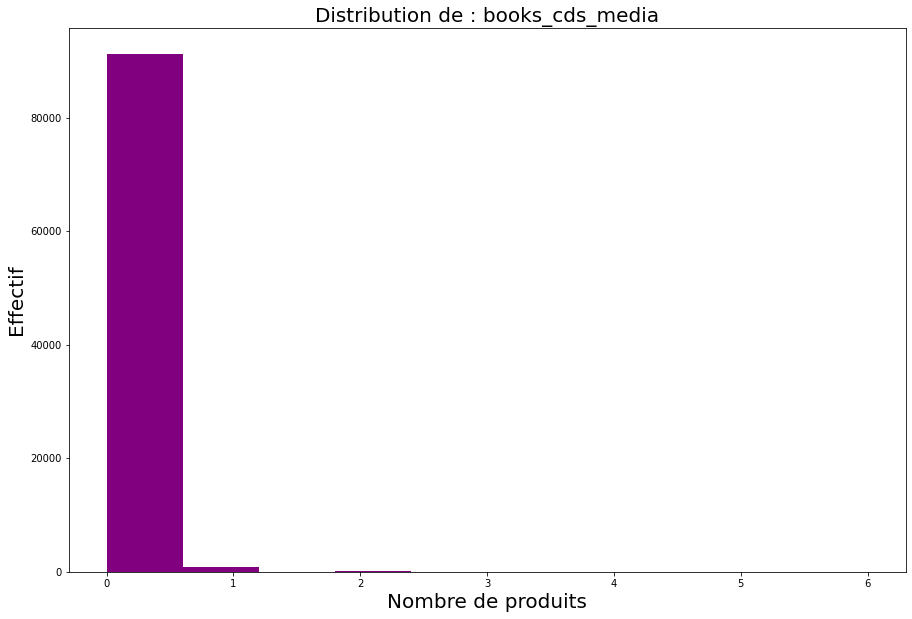

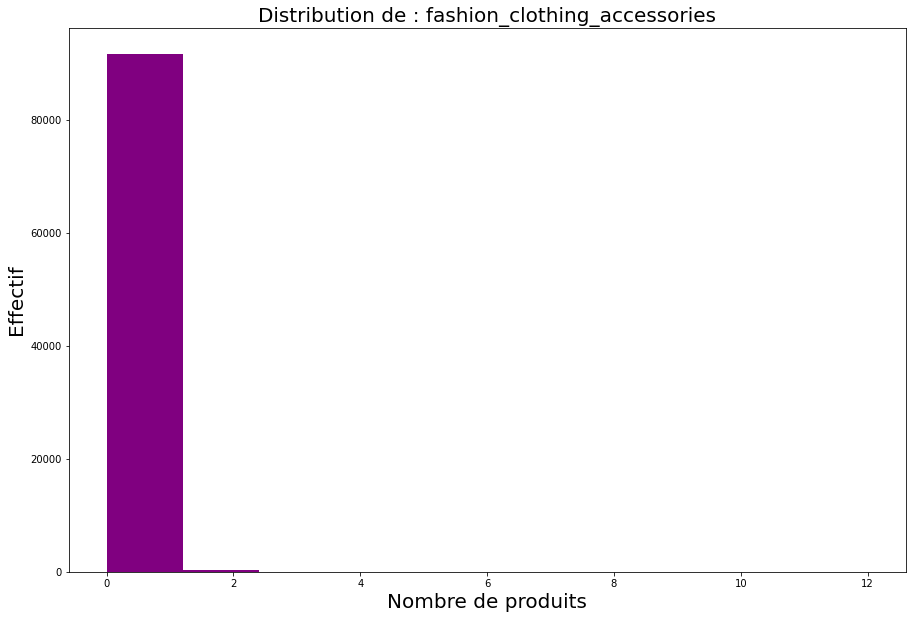

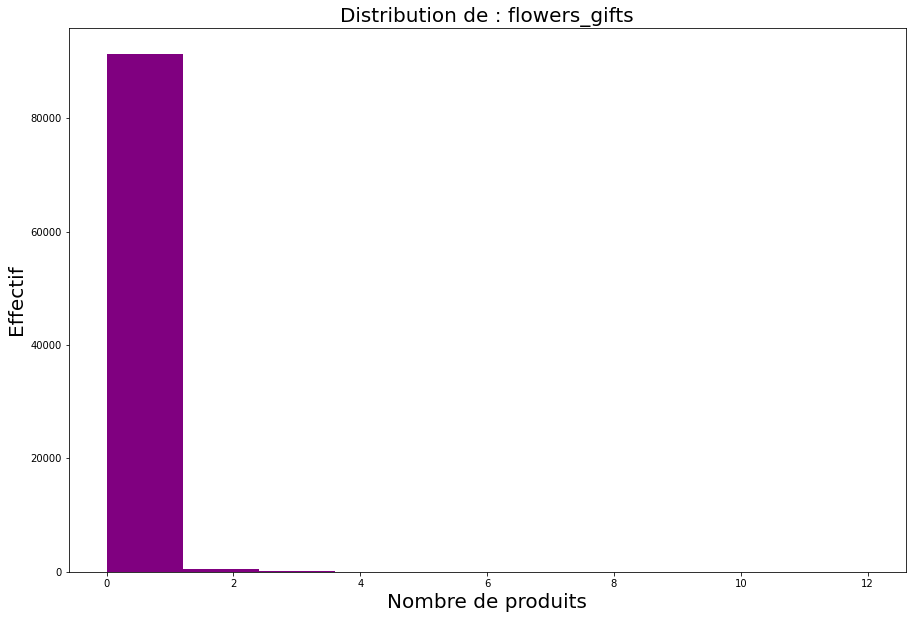

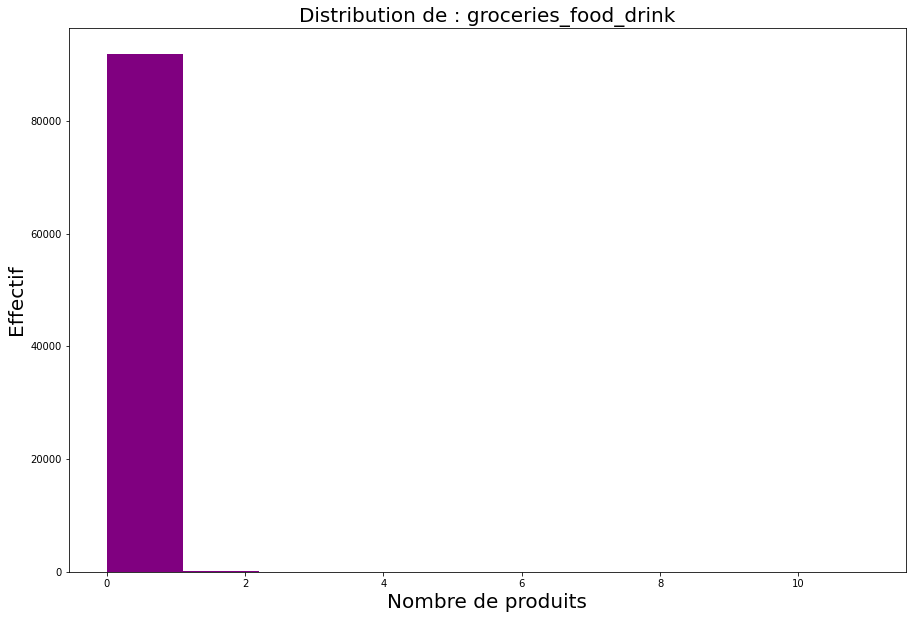

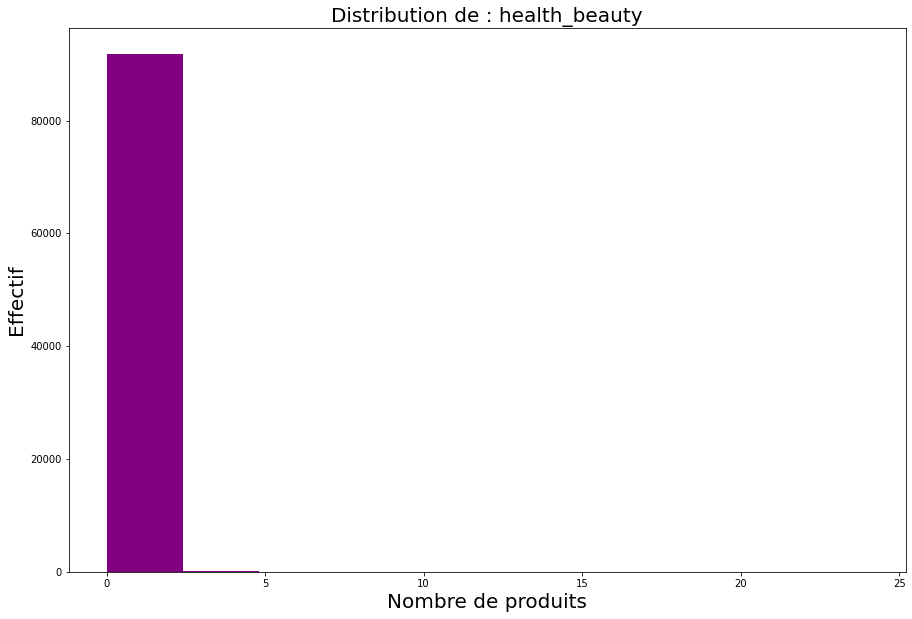

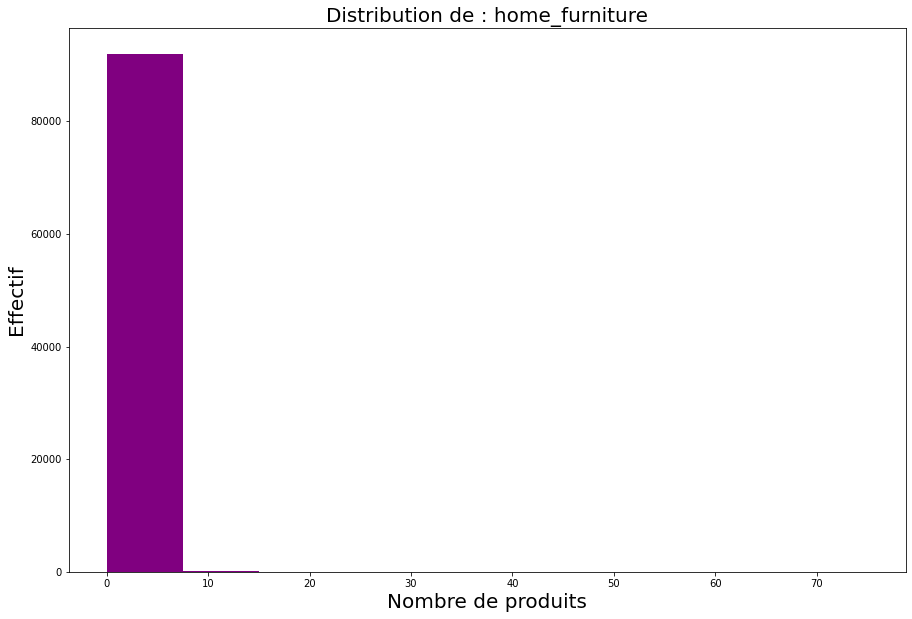

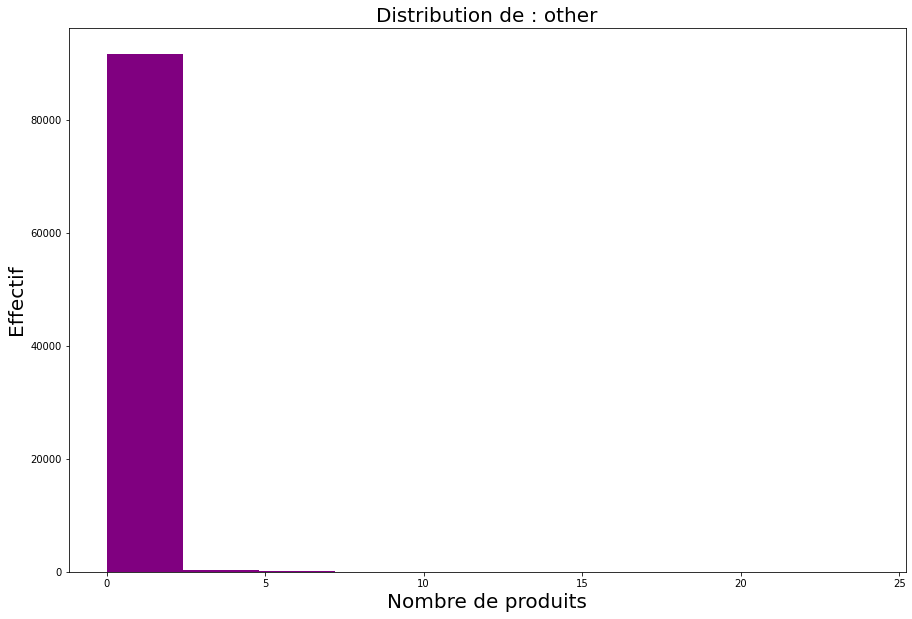

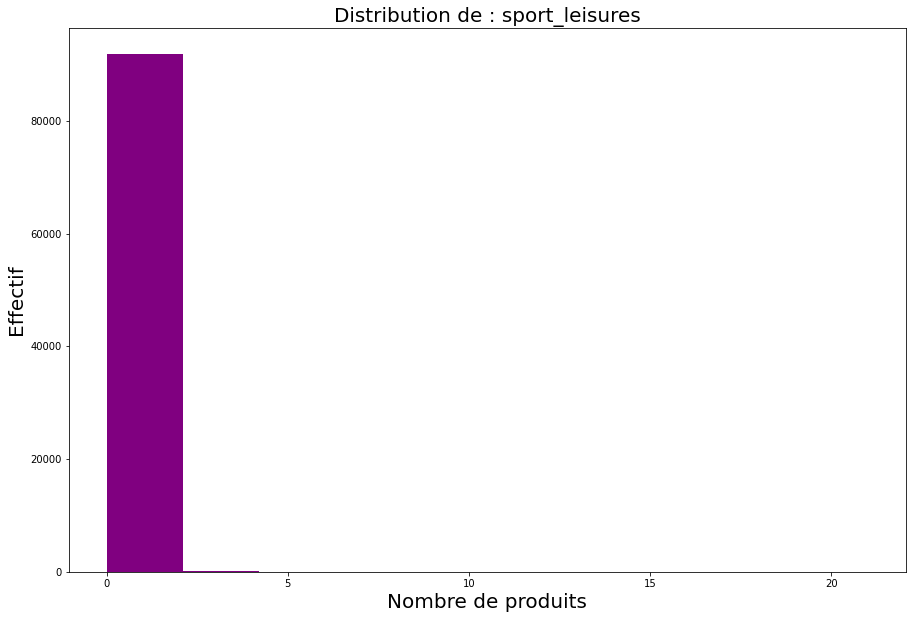

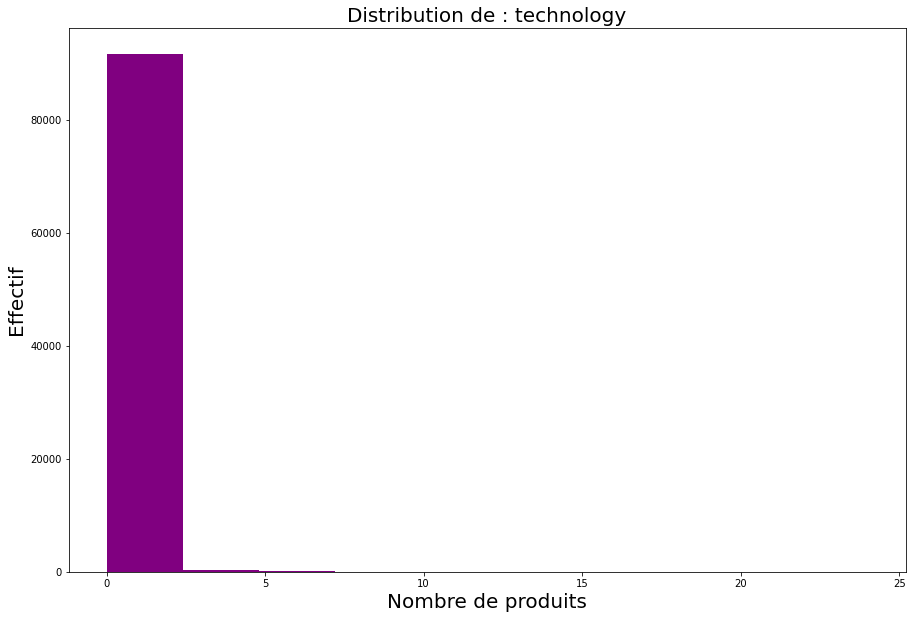

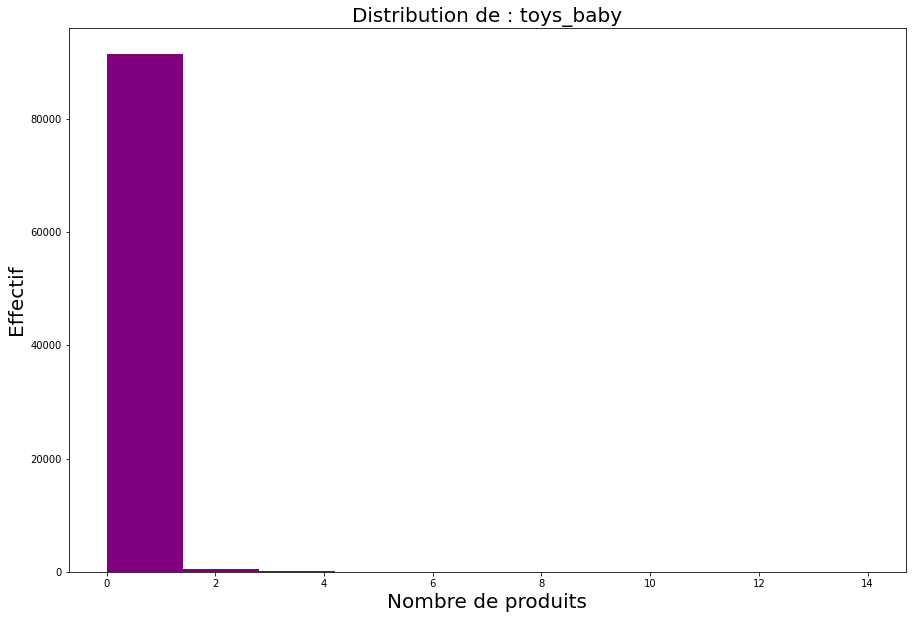

In [194]:
for col in df_customers_categories.columns:
    plt.figure(figsize=(15, 10))
    plt.hist(df_dataset_customers[col], color='purple')
    plt.xlabel("Nombre de produits", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

##### Nombre de commandes

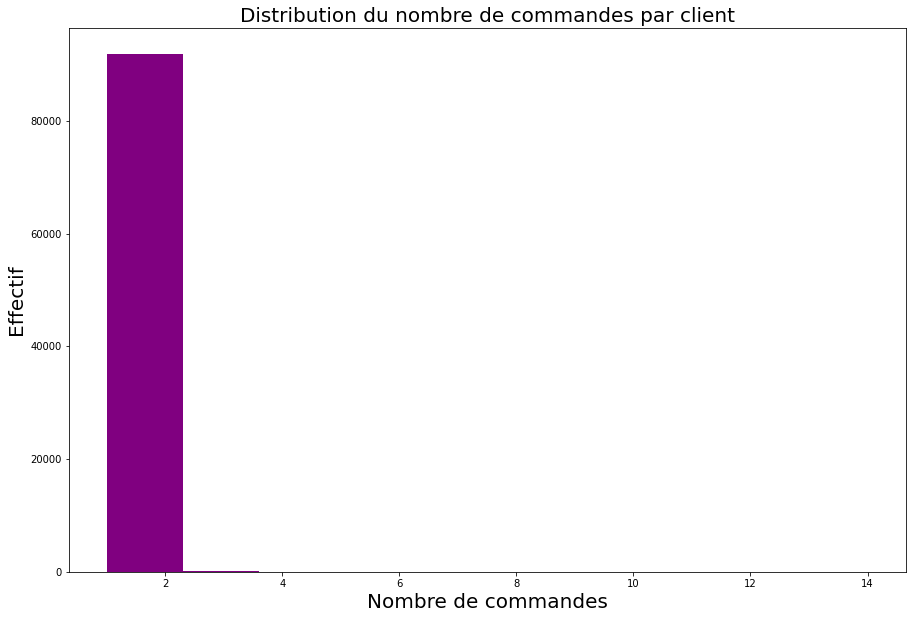

In [195]:
plt.figure(figsize=(15, 10))
plt.hist(df_dataset_customers['orders_number'], color='purple')
plt.xlabel("Nombre de commandes", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du nombre de commandes par client", fontsize=20)
plt.show()

##### Nombre de jours depuis la dernière commande

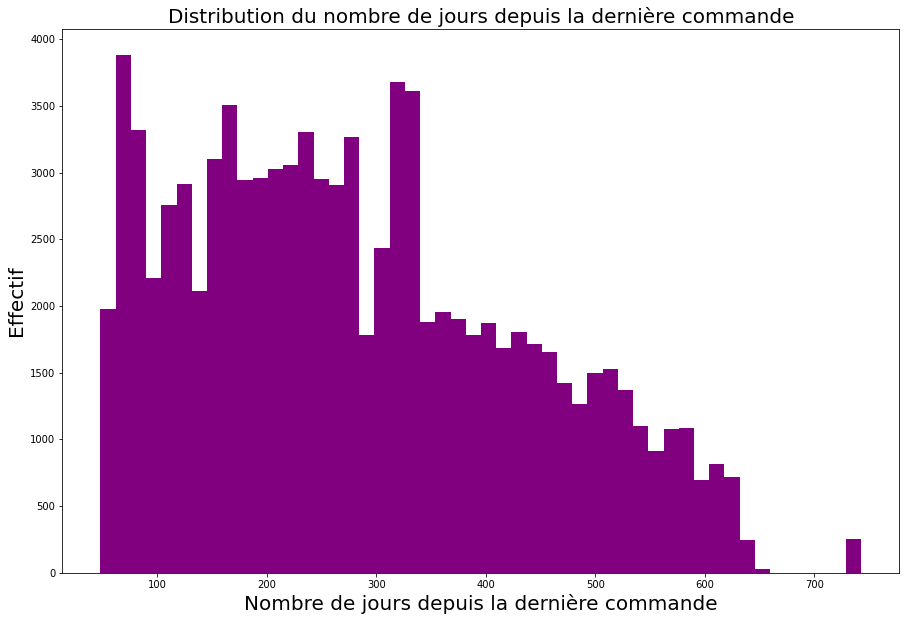

In [196]:
plt.figure(figsize=(15, 10))
plt.hist(df_dataset_customers['last_command_nb_days'], color='purple', bins=50)
plt.xlabel("Nombre de jours depuis la dernière commande", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du nombre de jours depuis la dernière commande",
          fontsize=20)
plt.show()

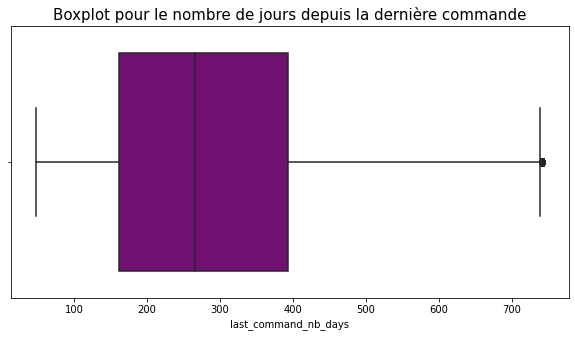

In [197]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='last_command_nb_days',
            data=df_dataset_customers, color='purple')
plt.title("Boxplot pour le nombre de jours depuis la dernière commande",
          fontsize=15)
plt.show()

##### Montants des achats

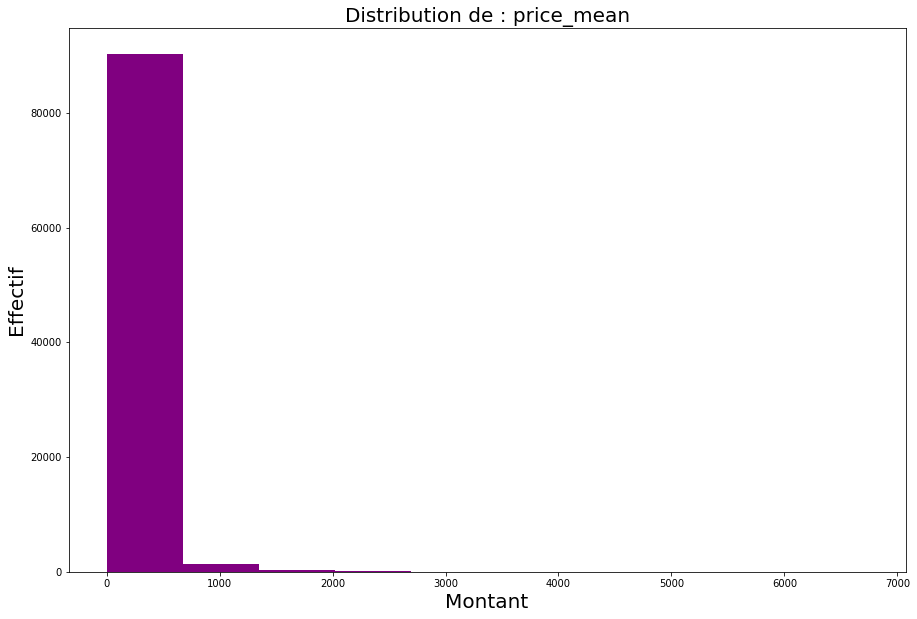

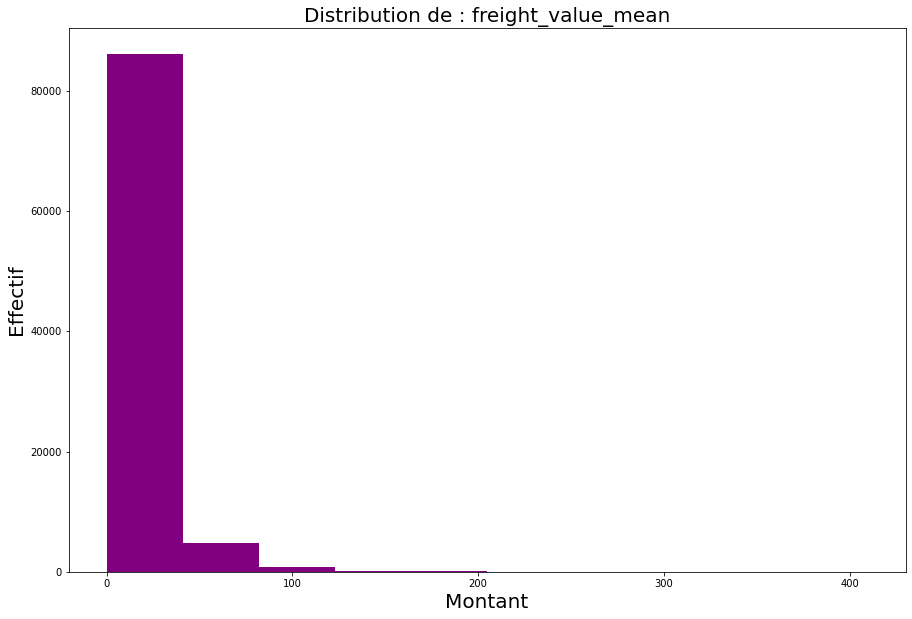

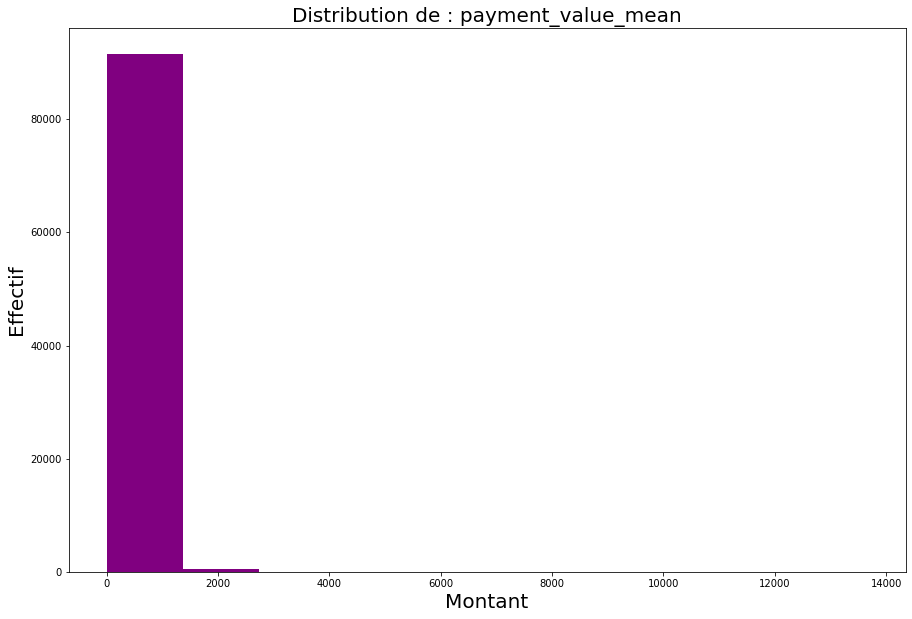

In [198]:
for col in ['price_mean', 'freight_value_mean', 'payment_value_mean']:
    plt.figure(figsize=(15, 10))
    plt.hist(df_dataset_customers[col], color='purple')
    plt.xlabel("Montant", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

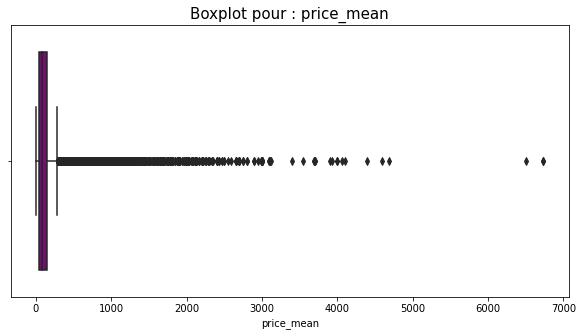

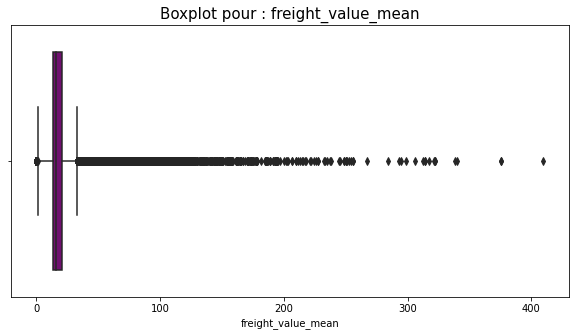

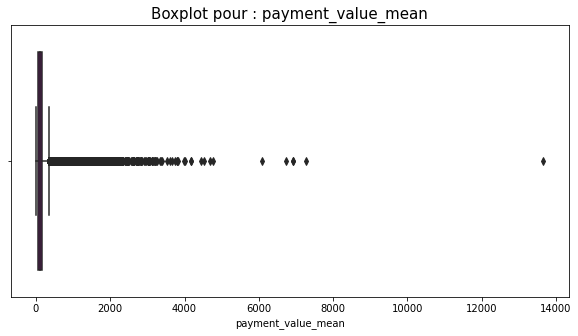

In [200]:
for col in ['price_mean', 'freight_value_mean', 'payment_value_mean']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=df_dataset_customers, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

##### Paiements

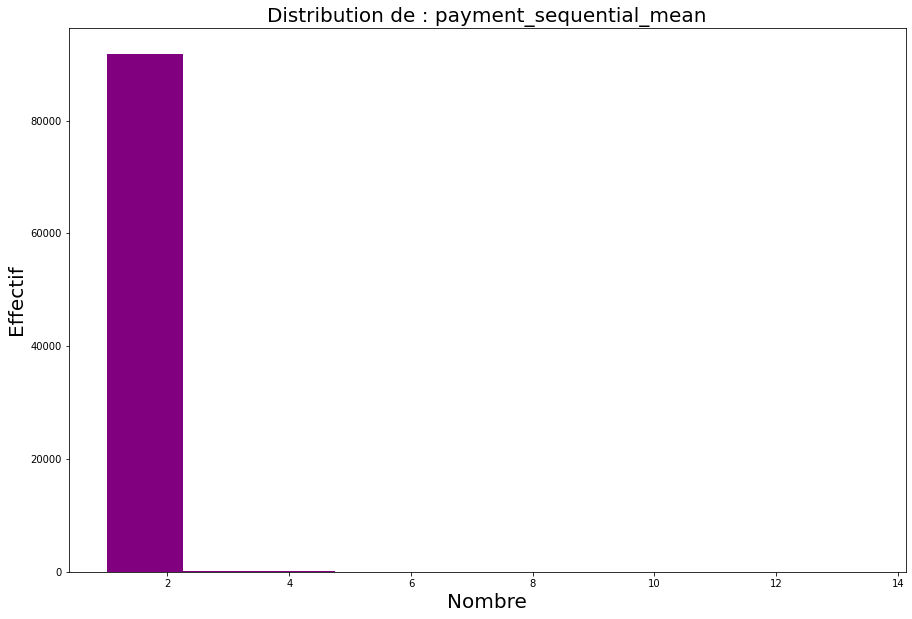

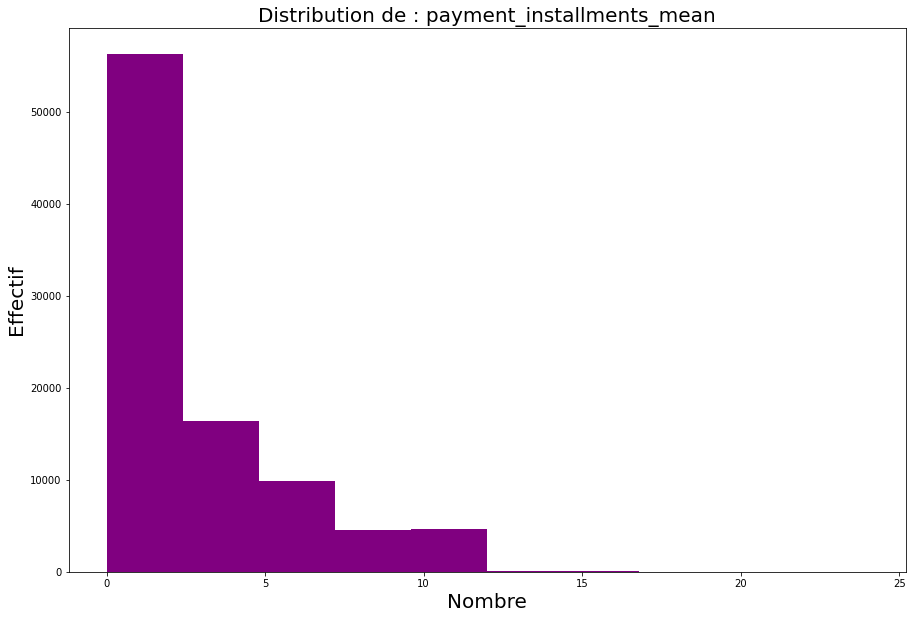

In [201]:
for col in ['payment_sequential_mean', 'payment_installments_mean']:
    plt.figure(figsize=(15, 10))
    plt.hist(df_dataset_customers[col], color='purple')
    plt.xlabel("Nombre", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

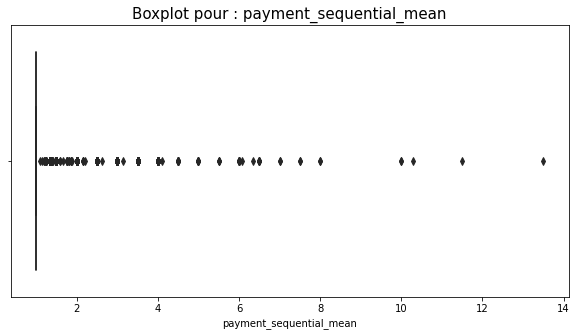

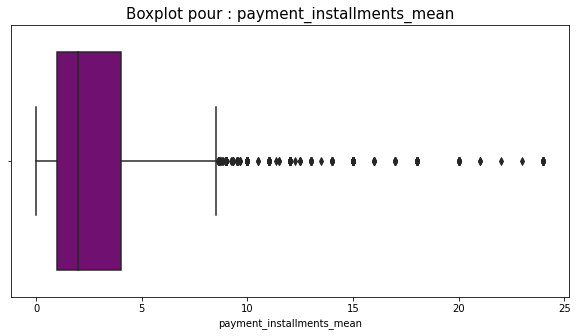

In [202]:
for col in ['payment_sequential_mean', 'payment_installments_mean']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=df_dataset_customers, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

##### Critiques des achats

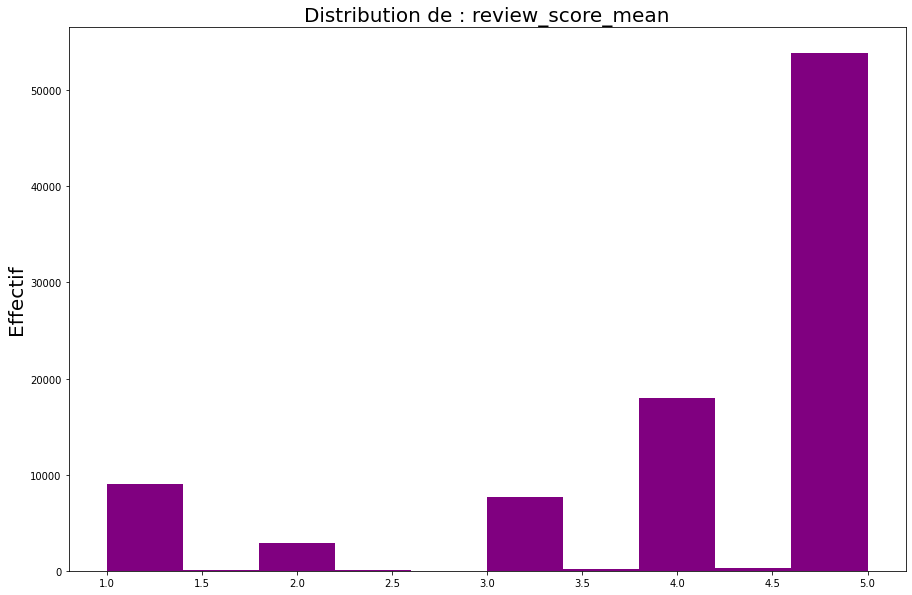

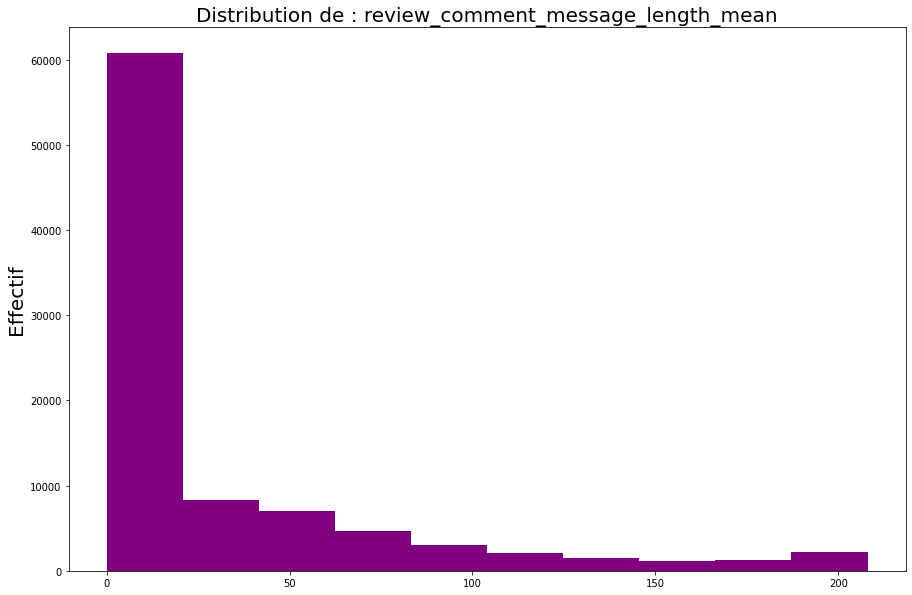

In [203]:
for col in ['review_score_mean', 'review_comment_message_length_mean']:
    plt.figure(figsize=(15, 10))
    plt.hist(df_dataset_customers[col], color='purple')
    plt.xlabel("", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

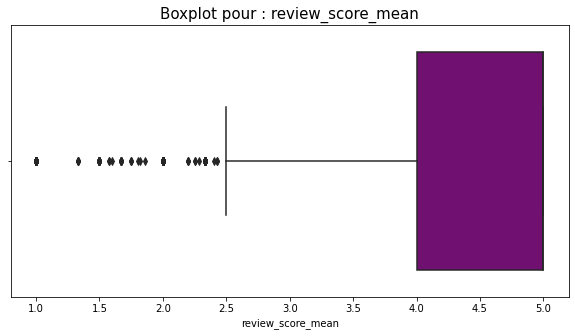

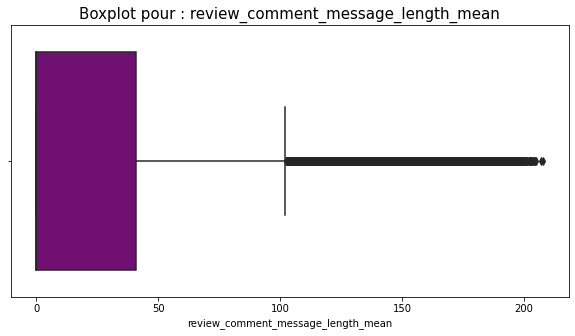

In [204]:
for col in ['review_score_mean', 'review_comment_message_length_mean']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=df_dataset_customers, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

##### Description des produits

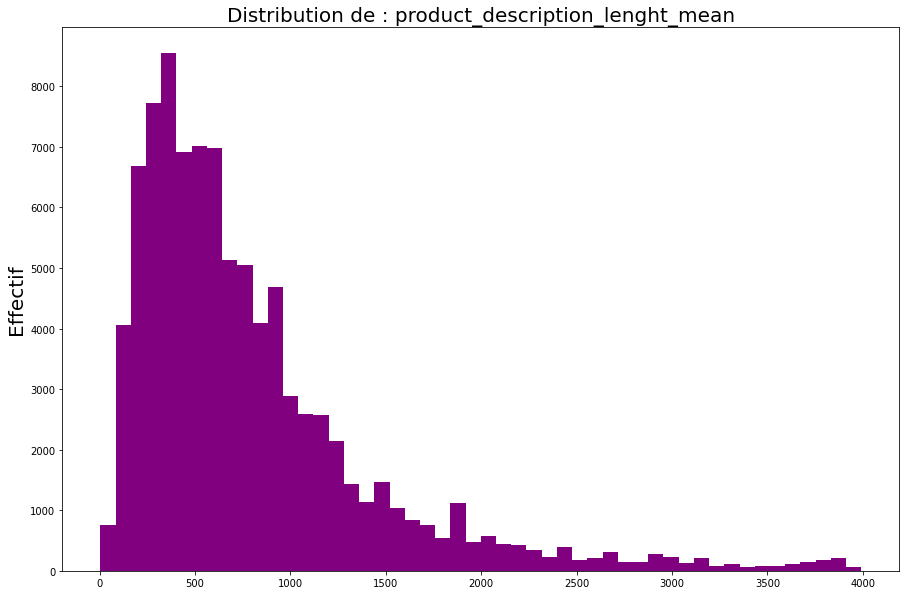

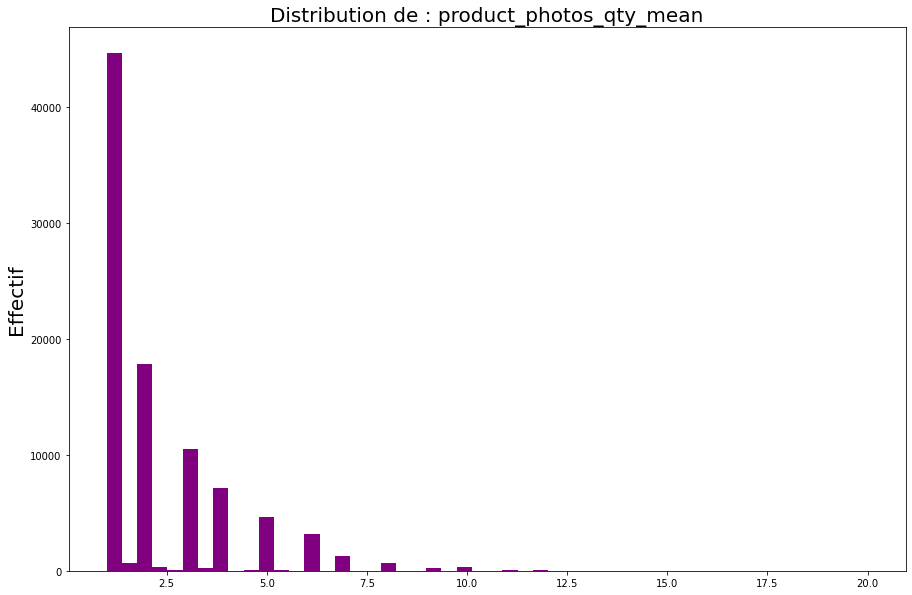

In [205]:
for col in ['product_description_lenght_mean', 'product_photos_qty_mean']:
    plt.figure(figsize=(15, 10))
    plt.hist(df_dataset_customers[col], color='purple', bins=50)
    plt.xlabel("", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

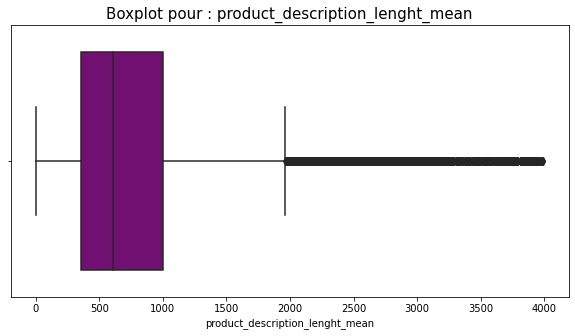

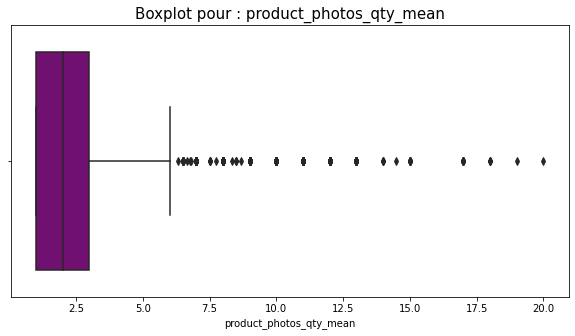

In [206]:
for col in ['product_description_lenght_mean', 'product_photos_qty_mean']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=df_dataset_customers, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

##### Délai de livraison

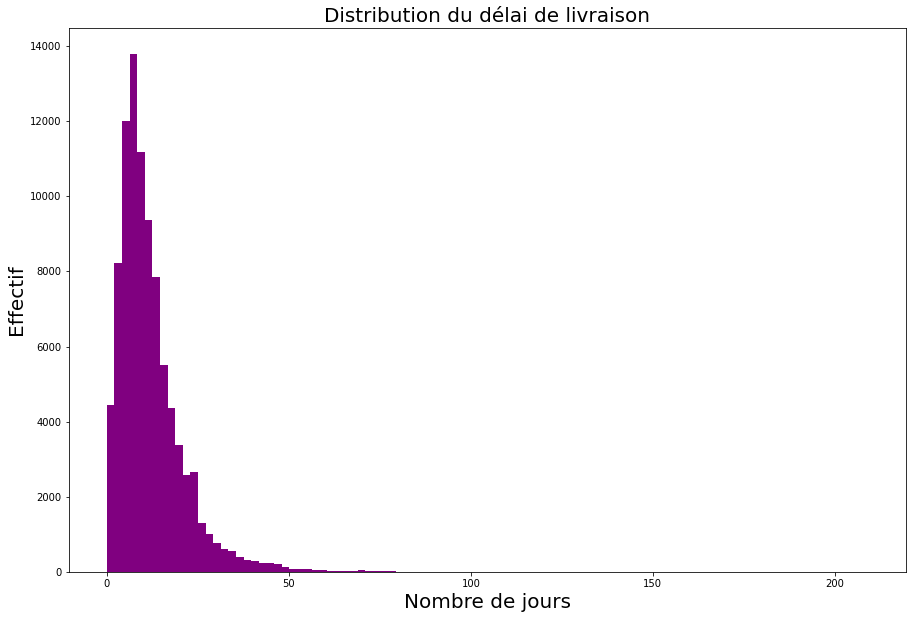

In [207]:
plt.figure(figsize=(15, 10))
plt.hist(df_dataset_customers['days_to_delivery_mean'],
         color='purple', bins=100)
plt.xlabel("Nombre de jours", fontsize=20)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du délai de livraison", fontsize=20)
plt.show()

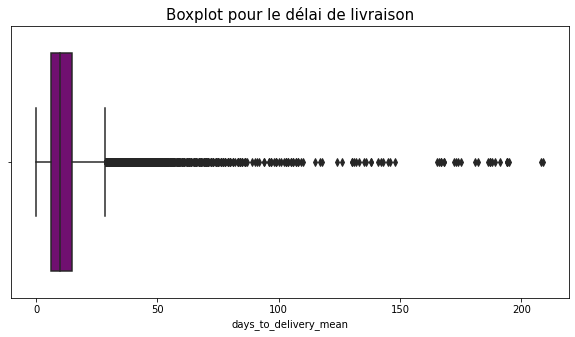

In [208]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='days_to_delivery_mean', data=df_dataset_customers,
            color='purple')
plt.title("Boxplot pour le délai de livraison", fontsize=15)
plt.show()